# Objective

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [1]:
#Supress warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import numpy and pandas packages
import numpy as np
import pandas as pd

#import matplotlib and seaborn libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set Display options to view the data properly
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
#Read train.csv dataset into sale_data dataframe
missing_values = ["n/a", "na", "--","NA","NaN"]
sale_data = pd.read_csv('./train.csv', encoding= 'iso-8859-1', na_values=missing_values)
sale_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

In [5]:
#Lets see shape of the dataset
sale_data.shape

(1460, 81)

Insights - We have 1460 records with 81 columns.

In [6]:
#Lets see data types of our features

sale_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
#Numeric Features
num_cols = sale_data.select_dtypes(include = ['int32', 'int64','float32','float64']).columns.to_list()
cat_cols = sale_data.select_dtypes(include = ['object']).columns.to_list()
print('Numerical Features in our dataset our:\n\n',num_cols)

print('\nCategorical Features in our dataset our:\n\n',cat_cols)

Numerical Features in our dataset our:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical Features in our dataset our:

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electri

In [8]:
#Sample records
sale_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
#Describe Numeric Features
sale_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

# Missing Value Check

In [10]:
#Lets first check missing values in columns and rows in our dataset.

#Define a function to check missing values in a dataset
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100 *(data.isnull().sum()/data.isnull().count())).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [11]:
missing_data(sale_data)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


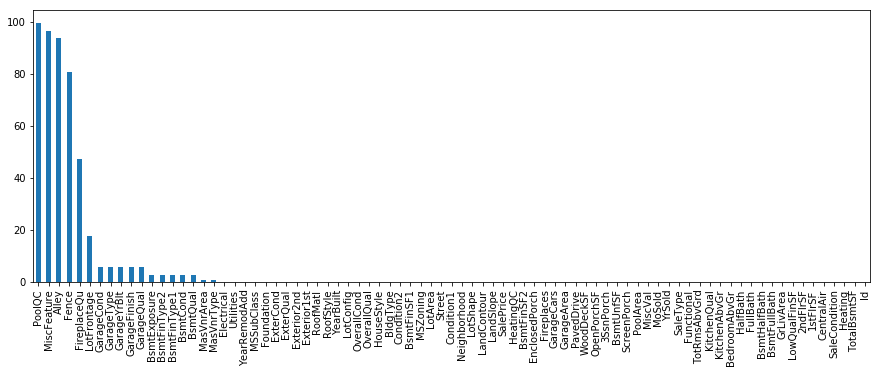

In [12]:
#Lets plot missing data
plt.figure(figsize=(15,5))
missing_data(sale_data)['Percent'].plot(kind='bar')
plt.show()

Insights - Through Data Dictionary, I found that columns like - PoolQC, MiscFeature, Alley, Fence, FireplaceQu, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, GarageCond, GarageType, GarageFinish and GarageQual have NA values to represent that that facility is not available for that particular house.

So, I will replace NULLs with their respective meaningful information for all these fields.

In [13]:
sale_data['PoolQC'].fillna('NA', inplace=True)
sale_data['MiscFeature'].fillna('NA', inplace=True)
sale_data['Alley'].fillna('NA', inplace=True)
sale_data['Fence'].fillna('NA', inplace=True)
sale_data['FireplaceQu'].fillna('NA', inplace=True)
basemt_cols=['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual']
garage_cols = ['GarageCond','GarageType','GarageFinish','GarageQual']
sale_data[basemt_cols] = sale_data[basemt_cols].fillna('NA')
sale_data[garage_cols] = sale_data[garage_cols].fillna('NA')
#Now if Garage is not present in the house, we have NA values in column - GarageYrBlt which represnets that the  column is not
#applicable for this house. So, I will represent it as 0
sale_data['GarageYrBlt'].fillna(0,inplace=True) 

In [14]:
#Lets again now see missing value count
missing_data(sale_data)

,Total,Percent
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000


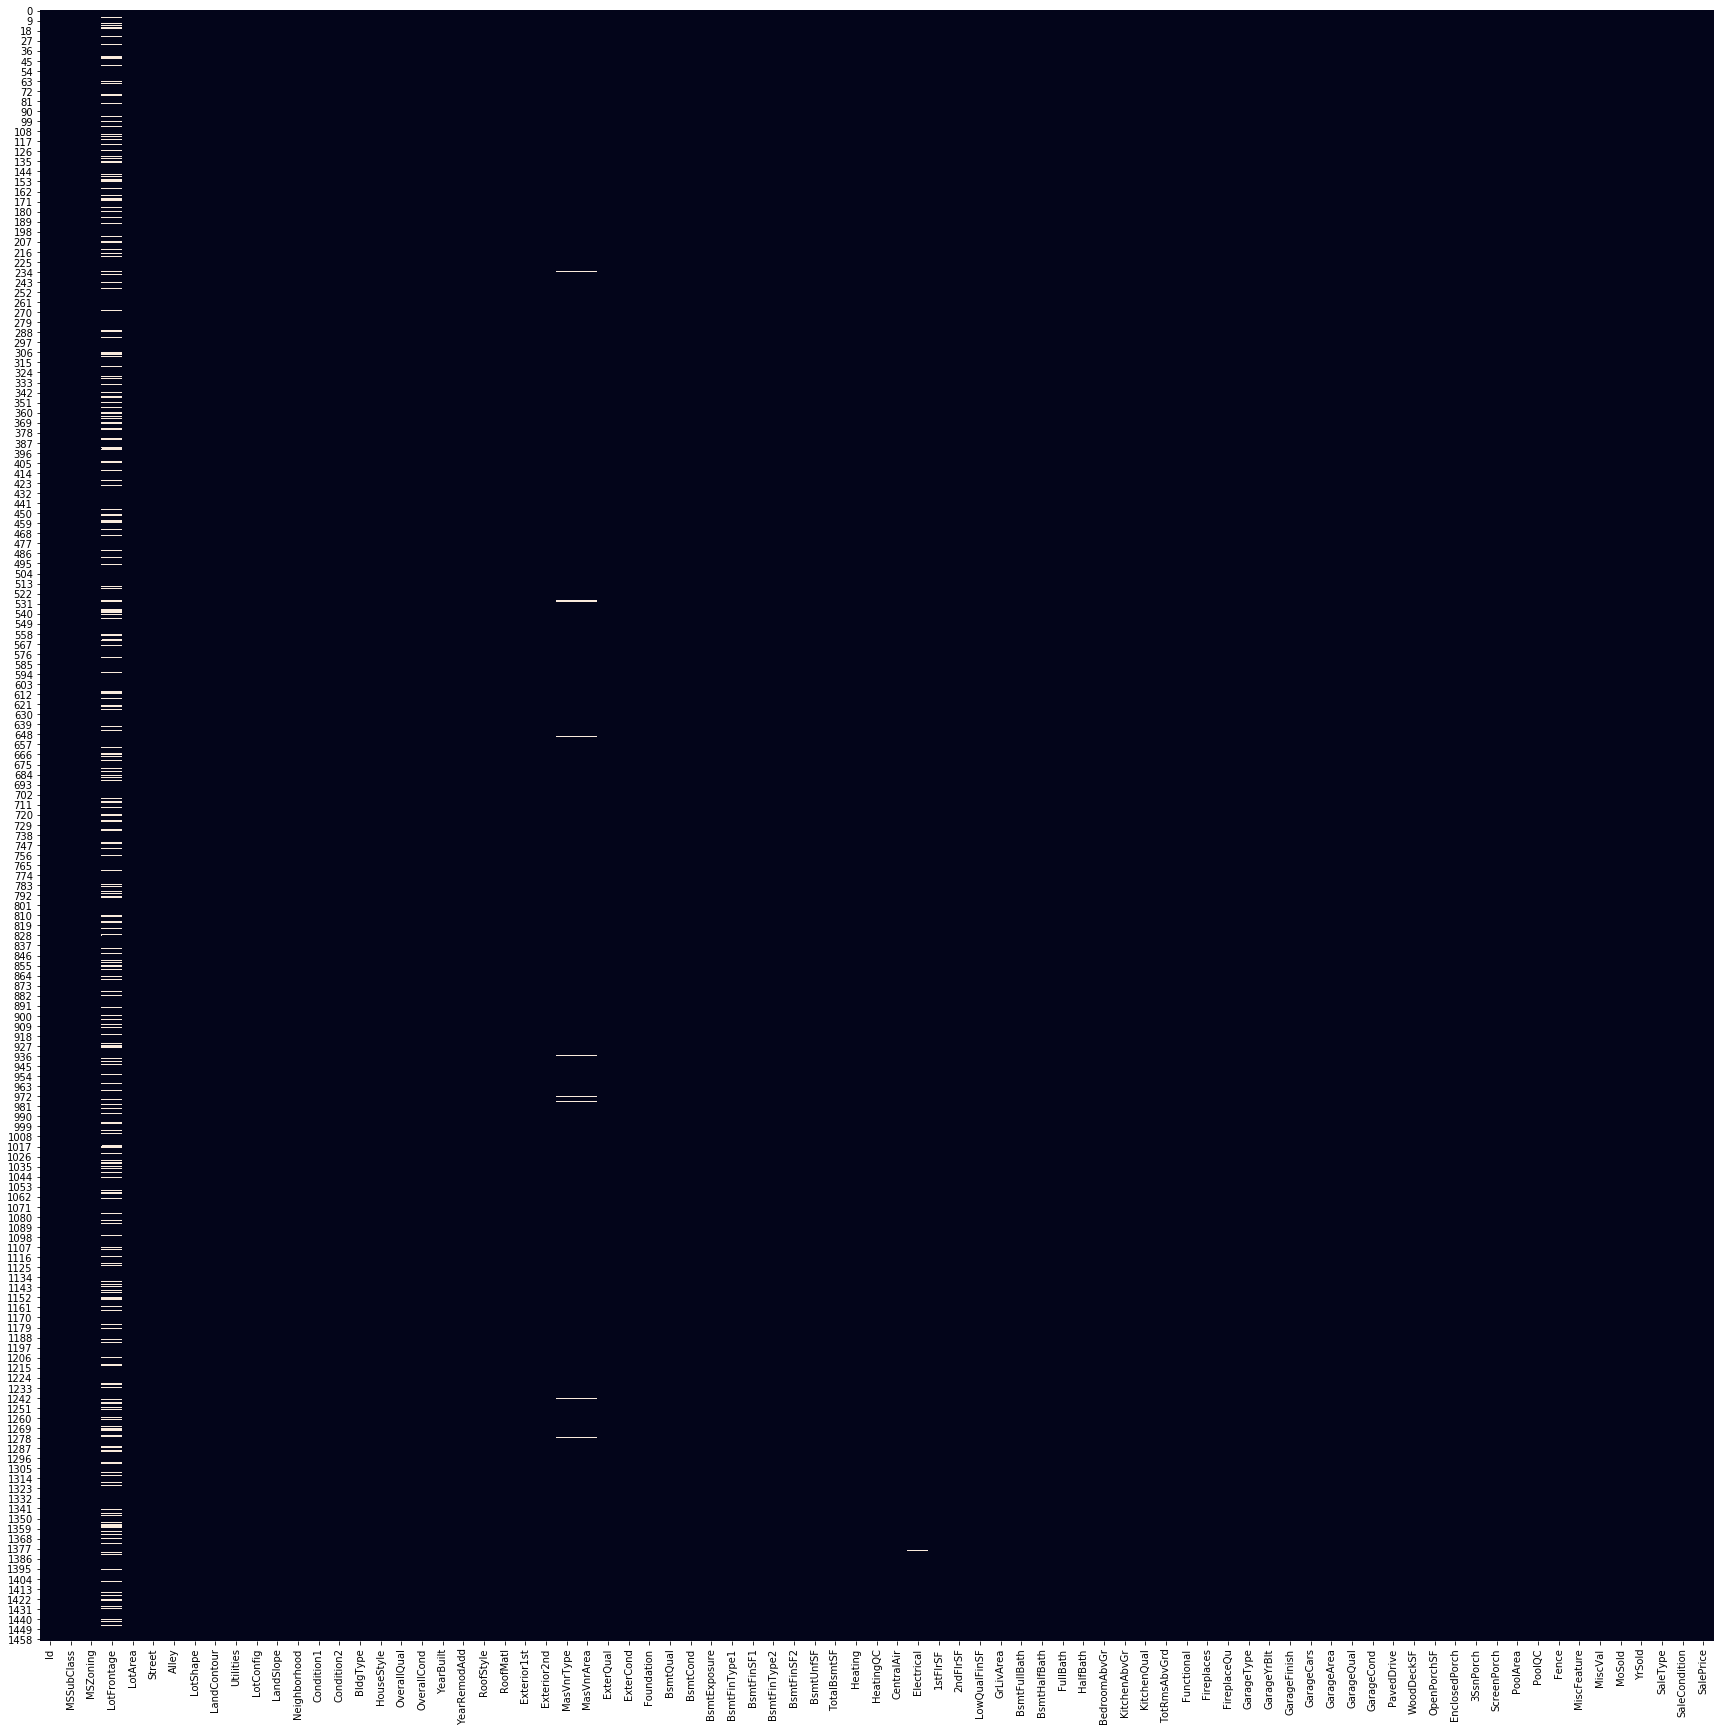

In [15]:
#Lets now first see if there is any pattern in misisng values of rest of the fields and their proximity.
plt.figure(figsize=(30,30))
sns.heatmap(sale_data.isnull(), cbar=False)
plt.show()

Insights - I see that MasVnrType and MasVnrArea values are missing in same record.
I also found that for MasVnrType, NONE is also coming as a value which represents this value is not same as other values.
I also agree that NA also has the same meaning. So, I will replace NULL for MasVnrType field as  NONE and will drive MasVnrArea based on this.

In [16]:
sale_data.groupby('MasVnrType')['MasVnrArea'].median()

MasVnrType
BrkCmn     192.0
BrkFace    202.0
None         0.0
Stone      206.5
Name: MasVnrArea, dtype: float64

In [17]:
#Impute MasVnrType and MasVnrArea
sale_data['MasVnrType'].fillna('None', inplace=True)
med_MasVnrArea = dict(sale_data.groupby('MasVnrType')['MasVnrArea'].median())['None']
sale_data['MasVnrArea'].fillna(med_MasVnrArea, inplace=True)

In [18]:
#To Impute LotFrontage
print('Skew in LotFrontage Column is: ', sale_data['LotFrontage'].skew())
print('\nDescribe LotFrontage:\n',sale_data['LotFrontage'].describe())

Skew in LotFrontage Column is:  2.163569142324884

Describe LotFrontage:
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


Insights - I see that data of LotFrontage column is right skewed and also from skew value of 2.16, I can say that it is moderately skewed.

So I will use median value to impute its missing data, so that this imputation does not change distribution of its data.

In [19]:
sale_data['LotFrontage'].fillna(sale_data['LotFrontage'].median(),inplace=True)

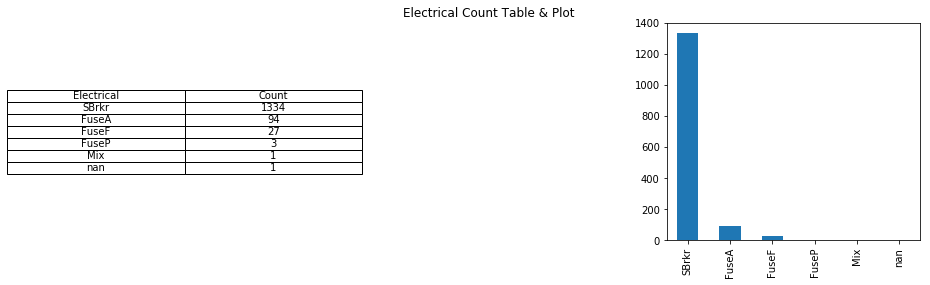

In [20]:
#To Impute Electrical
#Let's see value count of each value in this field
#Lets first create a dataframe with eletrical value and its count to plot it as table
electrical_count = pd.DataFrame(sale_data['Electrical'].value_counts(dropna=False))
electrical_count = electrical_count.reset_index(drop=False)

#Plot Electrical Count Table and Visualize it
plt.figure(figsize=(10,4))
ax= plt.subplot(121)
ax.table(cellText=electrical_count.values, colLabels=['Electrical', 'Count'], loc='left', cellLoc='center', colWidths =[0.7,0.7],edges='closed')
plt.title('Electrical Count Table & Plot')
ax.axis('off')
ax.axis('tight')
plt.subplot(122)
sale_data['Electrical'].value_counts(dropna=False).plot(kind='bar')

plt.show()

Insights - I see that SBrkr has maximum values and if I replace misisng value with this value, it won't even break current distribution.

In [21]:
sale_data['Electrical'].fillna(sale_data['Electrical'].mode()[0],inplace=True)

In [22]:
#Lets again check misisng value count and percenatge
missing_data(sale_data)

,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


Now, our dataset doesn't contain missing data.

Lets now lets correct data types of those nuemric columns for which we had NULL data.
As I know np.NaN is of float type, so they would have been imported with float data types.

In [23]:
#To correct data types of columns which were float because of presence of NULL values
sale_data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = sale_data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].astype(int)

In [24]:
sale_data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int32
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea        int32
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

I see that now the columns data types have been corrected.

# Duplicate Data Check

In [25]:
#I see that we have 1 column named ID which has a unique ID for each house in our dataset. So, now to check for duplicate data, I need to drop this variable.
sale_data.drop('Id', axis=1, inplace=True)
any(sale_data.duplicated())

False

Insights - I don't see any duplicate record available in our dataset.

# Describe Categorical Columns - 
To check for any redundant column and columns having less variation

In [26]:
cat_cols = sale_data.select_dtypes(include='object').columns.to_list()
sale_data[cat_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [27]:
#Insights - I see that columns Street,Utilities, PoolQc and Alley are columns with veru less variation.
#Lets drop them as they won't be able to provide us any insight.

sale_data.drop(['Street','Utilities', 'PoolQC', 'Alley'], axis=1, inplace=True)

# Describe Numeric Columns

In [28]:
sale_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Insights - I see that for most of the columns data is skewed that shows presence of outliers in dataset.

### Outlier Detection

In [29]:
#Lets first check for mean and std. deviation of target variable - Sale Price

In [30]:
from scipy.stats import norm, skew
mu, sigma = norm.fit(sale_data['SalePrice'])
print('Mean of Sale Price is: ', mu)
print('Standard Deviation of Sale Price is: ', sigma)

Mean of Sale Price is:  180921.19589041095
Standard Deviation of Sale Price is:  79415.29188606751


In [31]:
#I see that sale price column has a huge value for std deviation. Lets dig further into this first.

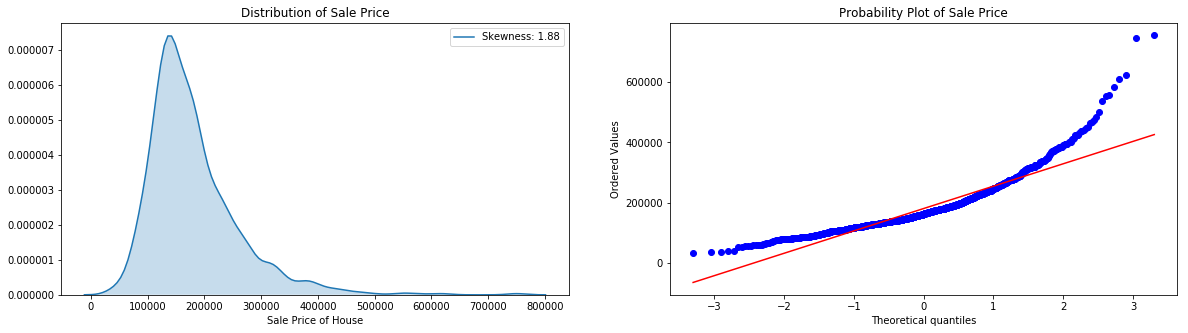

In [32]:
#Lets first see distribution of target variable - SalePrice
skewness = sale_data['SalePrice'].skew()
from scipy import stats
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(sale_data['SalePrice'], shade= True, label= 'Skewness: {:.2f}'.format(skewness))
plt.title("Distribution of Sale Price")
plt.xlabel('Sale Price of House')
plt.subplot(122)
stats.probplot(sale_data['SalePrice'],plot=plt)
plt.title("Probability Plot of Sale Price")
plt.show()

Insights - I see that data is normally ditsributed but moderately skewed at the right side. This can clearly be seen from 2nd plot.

In [33]:
#I see that SalePrice data is skewed in our dataset. But if we look at the objective, it is mentioned that company buy high value flats in low amout and then flips them on higher price.
# So, we can not leave houses with high sale price data.

# Lets go ahead and take log transformation of the column.

sale_data['SalePrice'] = np.log1p(sale_data['SalePrice'])

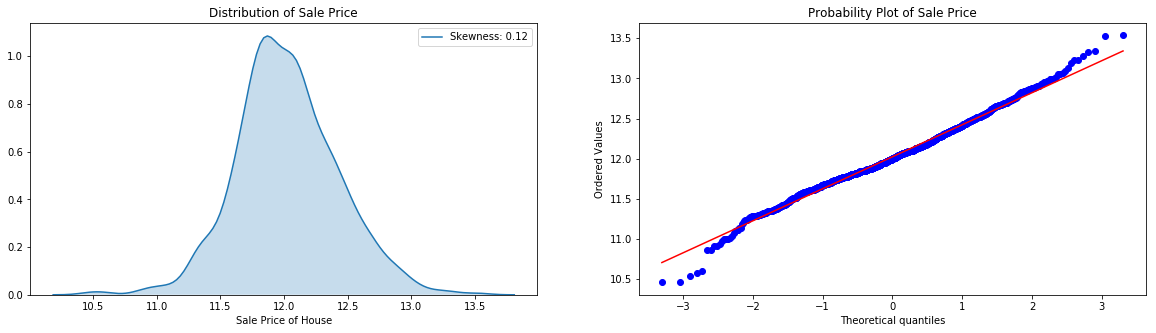

In [34]:
#Lets again see distribution of target variable - SalePrice
skewness = sale_data['SalePrice'].skew()
from scipy import stats
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(sale_data['SalePrice'], shade= True, label= 'Skewness: {:.2f}'.format(skewness))
plt.title("Distribution of Sale Price")
plt.xlabel('Sale Price of House')
plt.subplot(122)
stats.probplot(sale_data['SalePrice'],plot=plt)
plt.title("Probability Plot of Sale Price")
plt.show()

#Our Data Looks pretty good now.

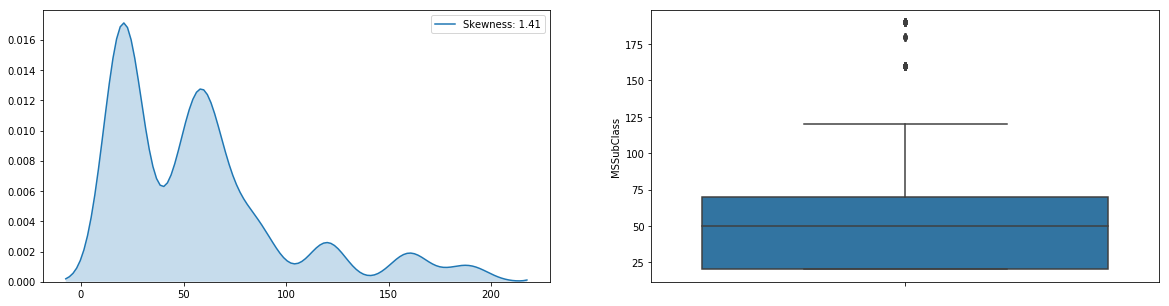

In [35]:

skewness = sale_data['MSSubClass'].skew()
from scipy import stats
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(sale_data['MSSubClass'], shade= True, label= 'Skewness: {:.2f}'.format(skewness))
plt.subplot(122)
sns.boxplot(y=sale_data['MSSubClass'])
plt.show()

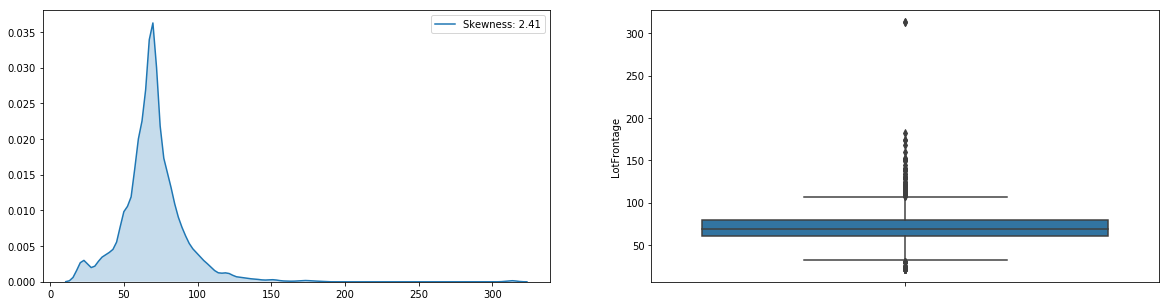

In [36]:
#Lets see skewness for LotFrontage
skewness = sale_data['LotFrontage'].skew()
from scipy import stats
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(sale_data['LotFrontage'], shade= True, label= 'Skewness: {:.2f}'.format(skewness))
plt.subplot(122)
sns.boxplot(y=sale_data['LotFrontage'])
plt.show()

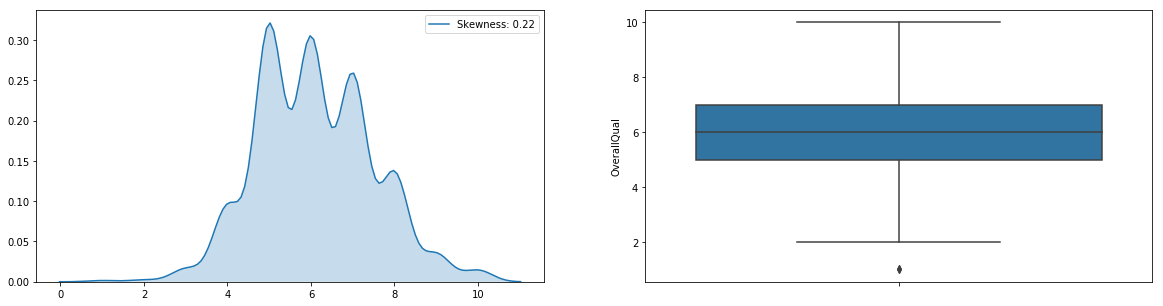

In [37]:
#Visualize skewness for OverallQual
skewness = sale_data['OverallQual'].skew()
from scipy import stats
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(sale_data['OverallQual'], shade= True, label= 'Skewness: {:.2f}'.format(skewness))
plt.subplot(122)
sns.boxplot(y=sale_data['OverallQual'])
plt.show()

In [38]:
#lets just check for skewness in all numeric columns in our dataset.
num_cols.remove('Id') #Remove ID column from num_cols
skew_df = pd.DataFrame(sale_data[num_cols].skew().abs(),columns=['Skew'])
skew_df.sort_values(by='Skew', ascending=False)

,Skew
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
GarageYrBlt,3.869501


In [39]:
#I see that data is skewed in our dataset. Lets keep them as it is for now to see relationship between variables.
#I will treat them at a later point while preparing data for modelling.

## Data Visualization 

In [40]:
clean_sale_data = sale_data.copy() #create a backup for 2nd step

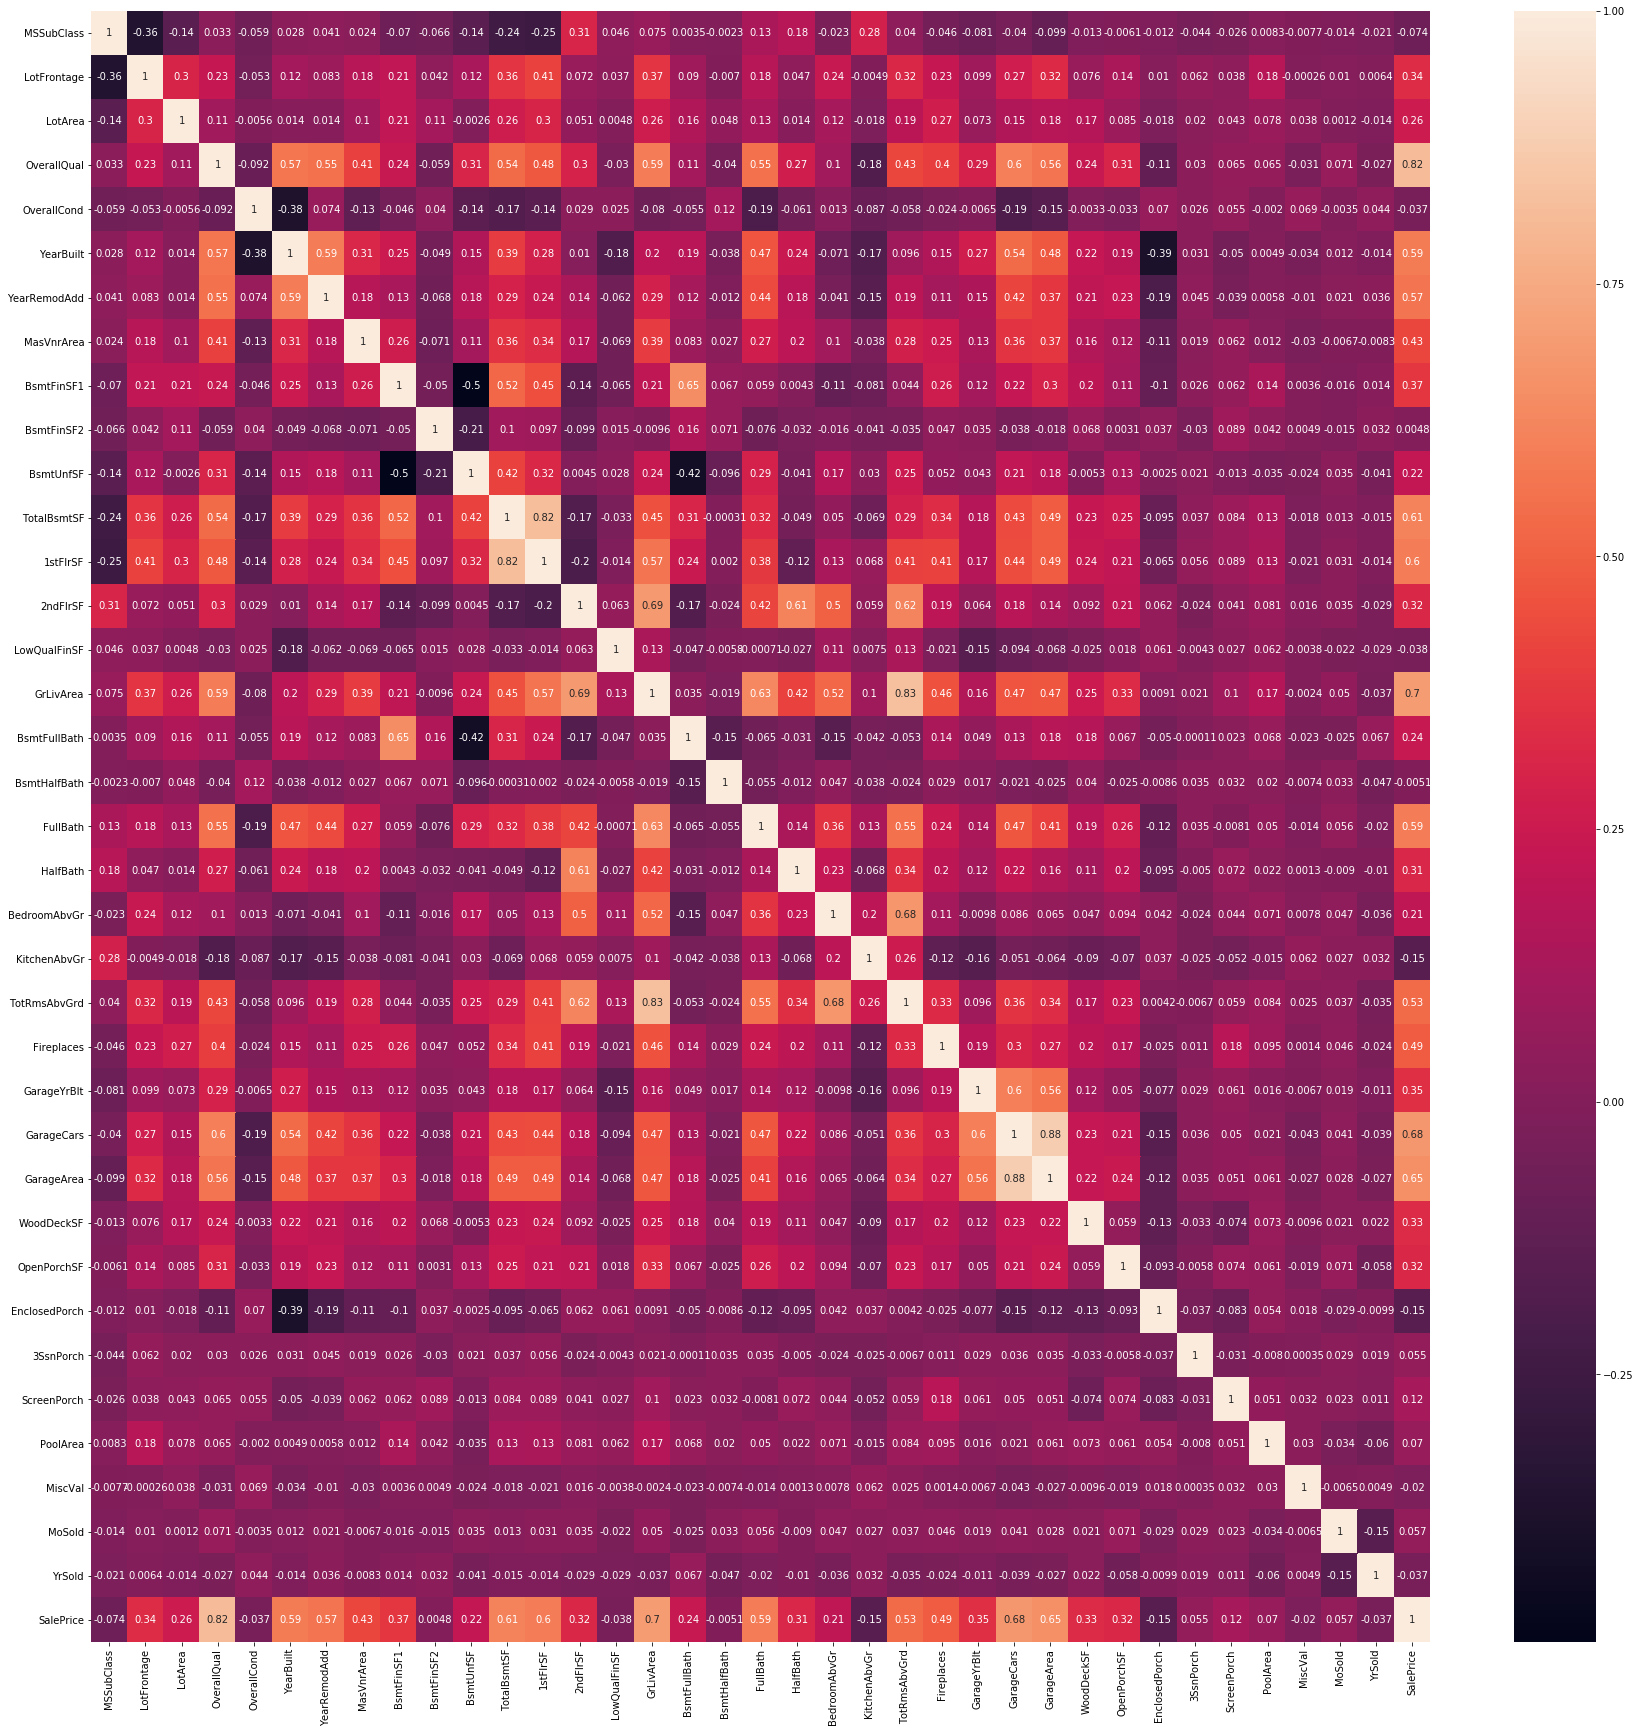

In [41]:
plt.figure(figsize=(30,30))
sale_data_corr = clean_sale_data.corr()
sns.heatmap(sale_data_corr, annot=True)
plt.show()

In [42]:
#I see a strong correlation between most of the columns. Lets treat them now.

In [43]:
#I will first check all those variables which have a strong relationship with our target variable.
corr_matrix = sale_data_corr
high_corr_var=np.where((corr_matrix>=0.5) | (corr_matrix<=-0.5))
high_corr_var_with_target=[(corr_matrix.columns[x],corr_matrix.columns[y],round(corr_matrix.iloc[x][y],2)) for x,y in zip(*high_corr_var) if x!=y and x<y and corr_matrix.columns[y]=='SalePrice']
sorted_corr = sorted(high_corr_var_with_target, key=lambda x: x[2], reverse=True)
sorted_corr

[('OverallQual', 'SalePrice', 0.82),
 ('GrLivArea', 'SalePrice', 0.7),
 ('GarageCars', 'SalePrice', 0.68),
 ('GarageArea', 'SalePrice', 0.65),
 ('TotalBsmtSF', 'SalePrice', 0.61),
 ('1stFlrSF', 'SalePrice', 0.6),
 ('YearBuilt', 'SalePrice', 0.59),
 ('FullBath', 'SalePrice', 0.59),
 ('YearRemodAdd', 'SalePrice', 0.57),
 ('TotRmsAbvGrd', 'SalePrice', 0.53)]

Insights - I see taht OverallQual has strongest relationship with SalePrice followed by GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt, FullBath, YearRemodAdd and TotRmsAbvGrd

But one point to keep in mind here is that higher correlation of YearBuilt and YearRemodAdd with SalePrice actually means that more recent the house is bulit or remodeled, more is the price.

In [44]:
#Lets list out all correlated columns with correlation >= 60%
high_corr_var=np.where((corr_matrix>=0.6) | (corr_matrix<=-0.6))
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y],round(corr_matrix.iloc[x][y],2) ) for x,y in zip(*high_corr_var) if x!=y and x<y and corr_matrix.columns[y]!='SalePrice']
sorted_corr_variables = sorted(high_corr_var, key=lambda x: x[2], reverse=True)
sorted_corr_variables

[('GarageCars', 'GarageArea', 0.88),
 ('GrLivArea', 'TotRmsAbvGrd', 0.83),
 ('TotalBsmtSF', '1stFlrSF', 0.82),
 ('2ndFlrSF', 'GrLivArea', 0.69),
 ('BedroomAbvGr', 'TotRmsAbvGrd', 0.68),
 ('BsmtFinSF1', 'BsmtFullBath', 0.65),
 ('GrLivArea', 'FullBath', 0.63),
 ('2ndFlrSF', 'TotRmsAbvGrd', 0.62),
 ('2ndFlrSF', 'HalfBath', 0.61),
 ('OverallQual', 'GarageCars', 0.6)]

Insights - 
1. I see that GarageCars in high correlation with OverallQual, GarageYrBlt, YearBuilt and GarageArea. So, I will drop GarageCars.
2. BsmtFinSF1 and BsmtFullBath are highly correlated. Here, I will drop BsmtFullBath field as BsmtFinSF1 makes more sense to business.
3. GarageCars and GarageArea are highly corrlelated. SO, I will drop GarageCars here as size of garage is square feet is what makes sense to company.
4. TotRmsAbvGrd is in high corrleation with GrLivArea. As GrLivArea is more important to us, I will drop first variable.
5. Also, I see that different variables are present in our data to represent square feet area of first, second floor and basement. I will create a single variable to represent total square feet area of all 3 floors in data preparation stage.
6. I will rest of the models as it is as they all looks important. So, I will let model decide whether to keep them or remove them.

In [45]:
clean_sale_data.drop(['GarageCars', 'BsmtFullBath', 'HalfBath', 'FullBath', 'TotRmsAbvGrd'],axis=1, inplace=True)

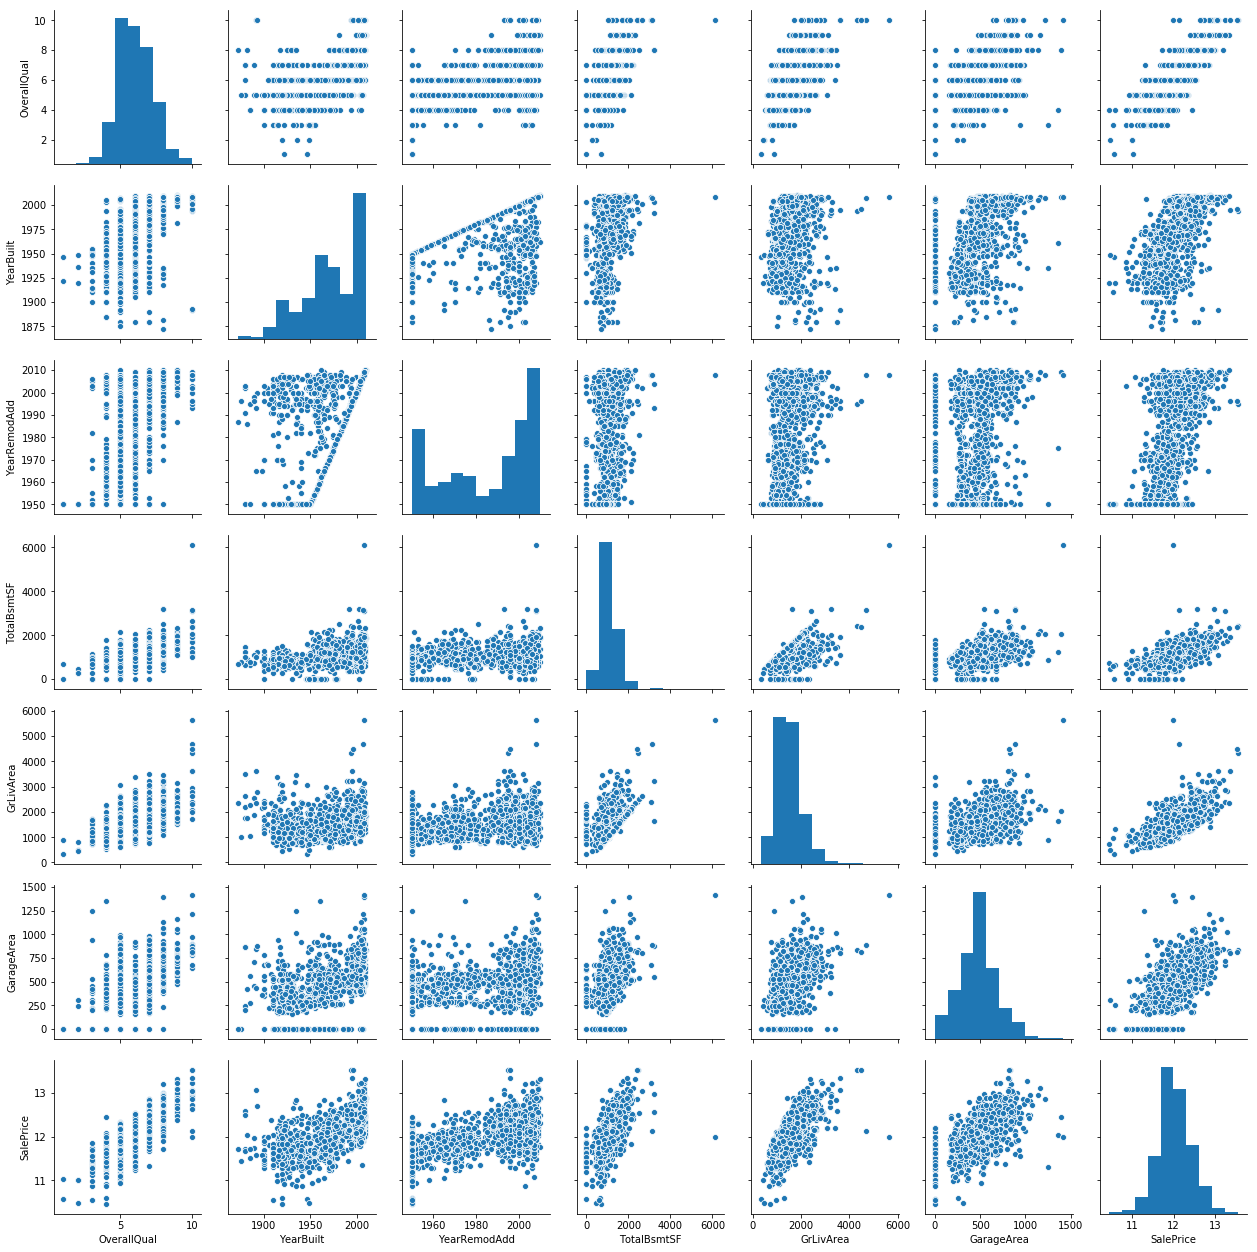

In [46]:
#Lets now Visualize only those varibales which are in high correlation with target variable which we have found in above steps.
col_list = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
sns.pairplot(data=clean_sale_data[col_list])

#Insights - I see some clear outliers for below list of plots:
1. TotalBsmtSF and SalePrice
2. GrLivArea and SalePrice
3. GarageArea and SalePrice

Lets look at them closely

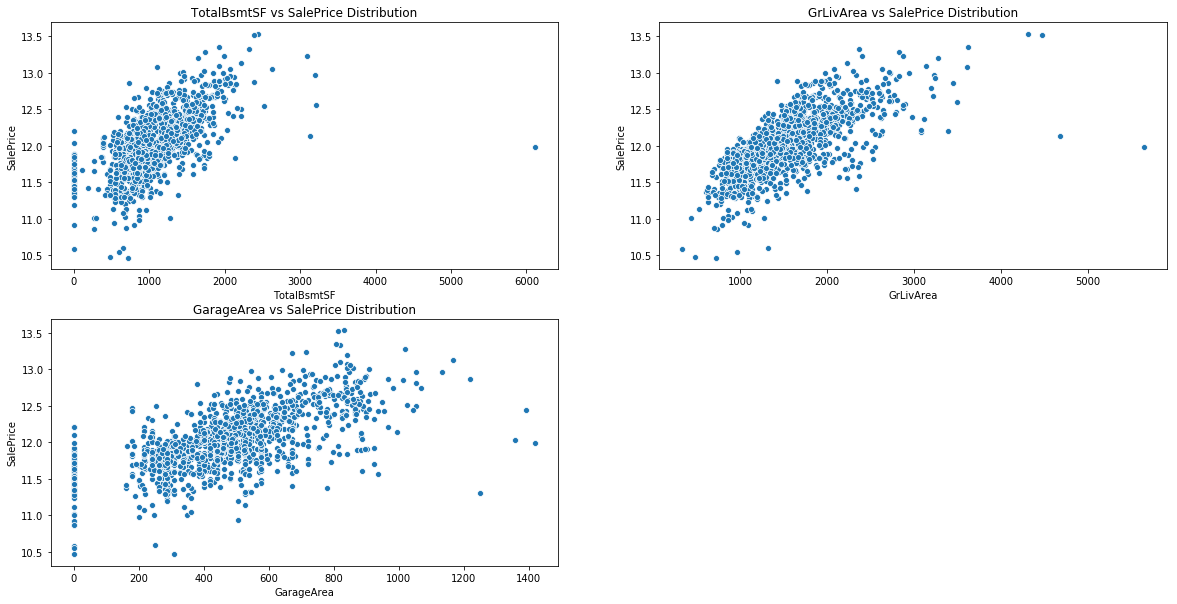

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.scatterplot(x='TotalBsmtSF', y = 'SalePrice', data = clean_sale_data)
plt.title('TotalBsmtSF vs SalePrice Distribution')
plt.subplot(222)
sns.scatterplot(x='GrLivArea', y = 'SalePrice', data = clean_sale_data)
plt.title('GrLivArea vs SalePrice Distribution')
plt.subplot(223)
sns.scatterplot(x='GarageArea', y = 'SalePrice', data = clean_sale_data)
plt.title('GarageArea vs SalePrice Distribution')
plt.show()

In [48]:
bkp = clean_sale_data.copy() #Create a backup

In [49]:
#In the first plot, I see that even though total square feet area of bsmt is highest, sale price is very low.
#2nd graph also shows outliers where GrLivArea is more than 4000 but sale price is very low.
#Similarly, in 3rd graph, where garage area is > 1200 but still sale price is less than 3000000
#and lastly in fourth graph, where total number of rooms are 14 but sale price is way too low.

#So, lets remove all these outliers.
clean_sale_data.drop(clean_sale_data[((clean_sale_data['TotalBsmtSF']>5000) & (clean_sale_data['SalePrice']<200000))].index, axis=0, inplace=True)
clean_sale_data.drop(clean_sale_data[((clean_sale_data['GrLivArea']>4000) & (clean_sale_data['SalePrice']<200000))].index, axis=0, inplace=True)
clean_sale_data.drop(clean_sale_data[((clean_sale_data['GarageArea']>1200) & (clean_sale_data['SalePrice']<300000))].index, axis=0, inplace=True)

clean_sale_data.shape

(1452, 71)

#We are now left with 1452 records and 71 variables.

In [50]:
def analysis(x):
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    ax = clean_sale_data[x].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.2%}'.format(height/len(clean_sale_data)),
            ha="center") 
    plt.title('Count Plot of '+x)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    
    plt.subplot(122)
    sns.boxplot(x=clean_sale_data[x], y=clean_sale_data['SalePrice'])
    plt.title('Distribution of Sale against '+ x)
    plt.show()

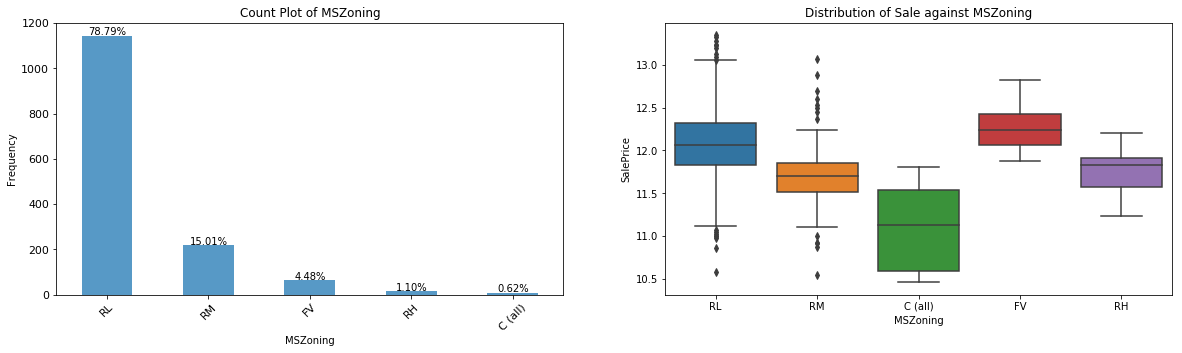

In [51]:
analysis('MSZoning')

Insights - 
1. I see that sale of those houses which are in Residential low density zone is more and also their price.
2. Houses in high residential zone have high prices but their demand is very less.
3. Houses in commercial area are preferred by only 0.6 percentage of population and they of are mid-ranged price.

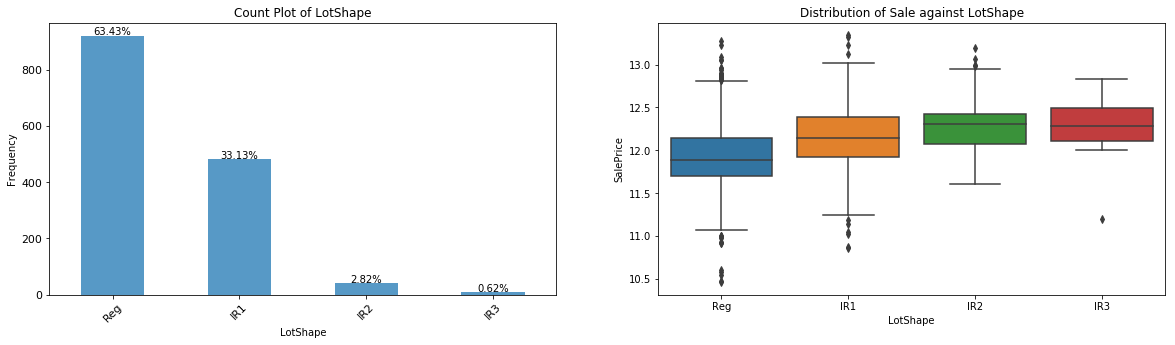

In [52]:
analysis('LotShape')

Insights -
I see that houses with regular shaped property are high in demand in our population 
but more profit can be earned by irregular property.

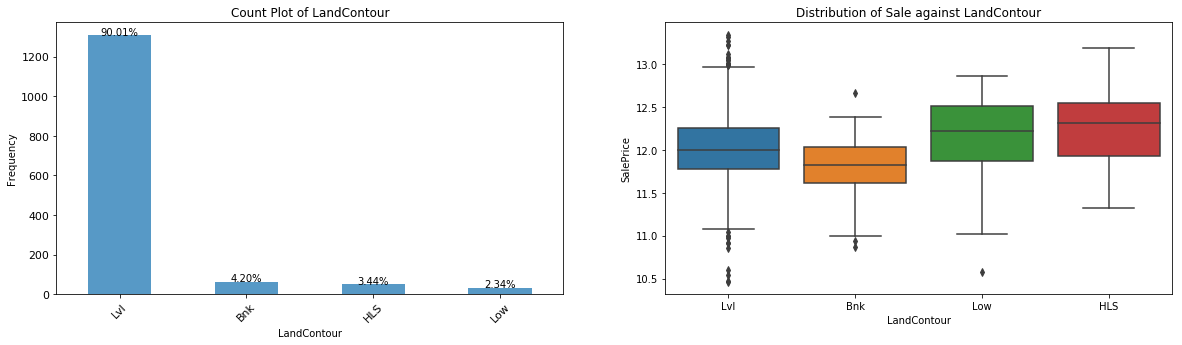

In [53]:
analysis('LandContour')

Insights - I see that level properties are high in demand and can get us the most profit.
but if we invest into hill side properties, they will get huge benefit.

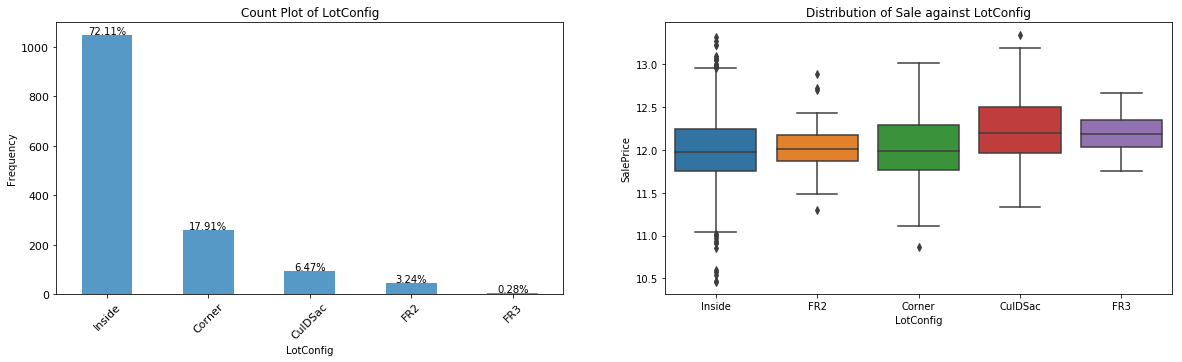

In [54]:
analysis('LotConfig')

Insight -
I see that insie lot properties are most in demand.
But even though CulDSac properties are sold at a higher price.

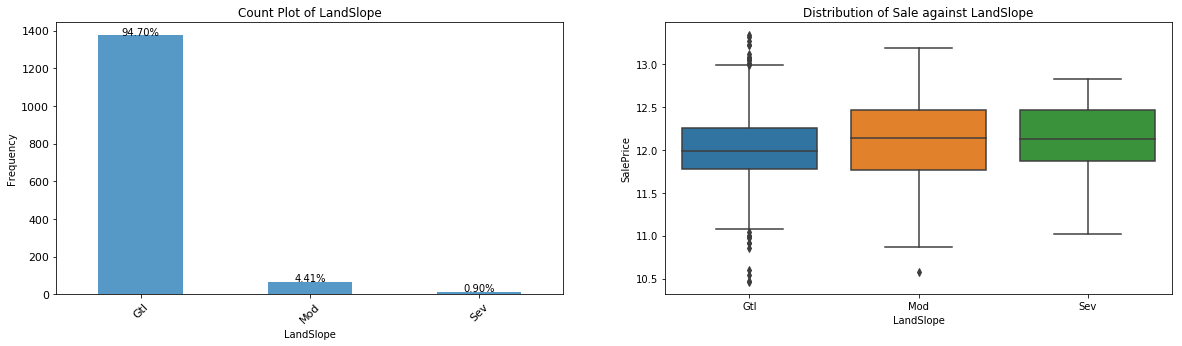

In [55]:
analysis('LandSlope')

In [56]:
#Insight - Gentle slope properties are in highest demand.

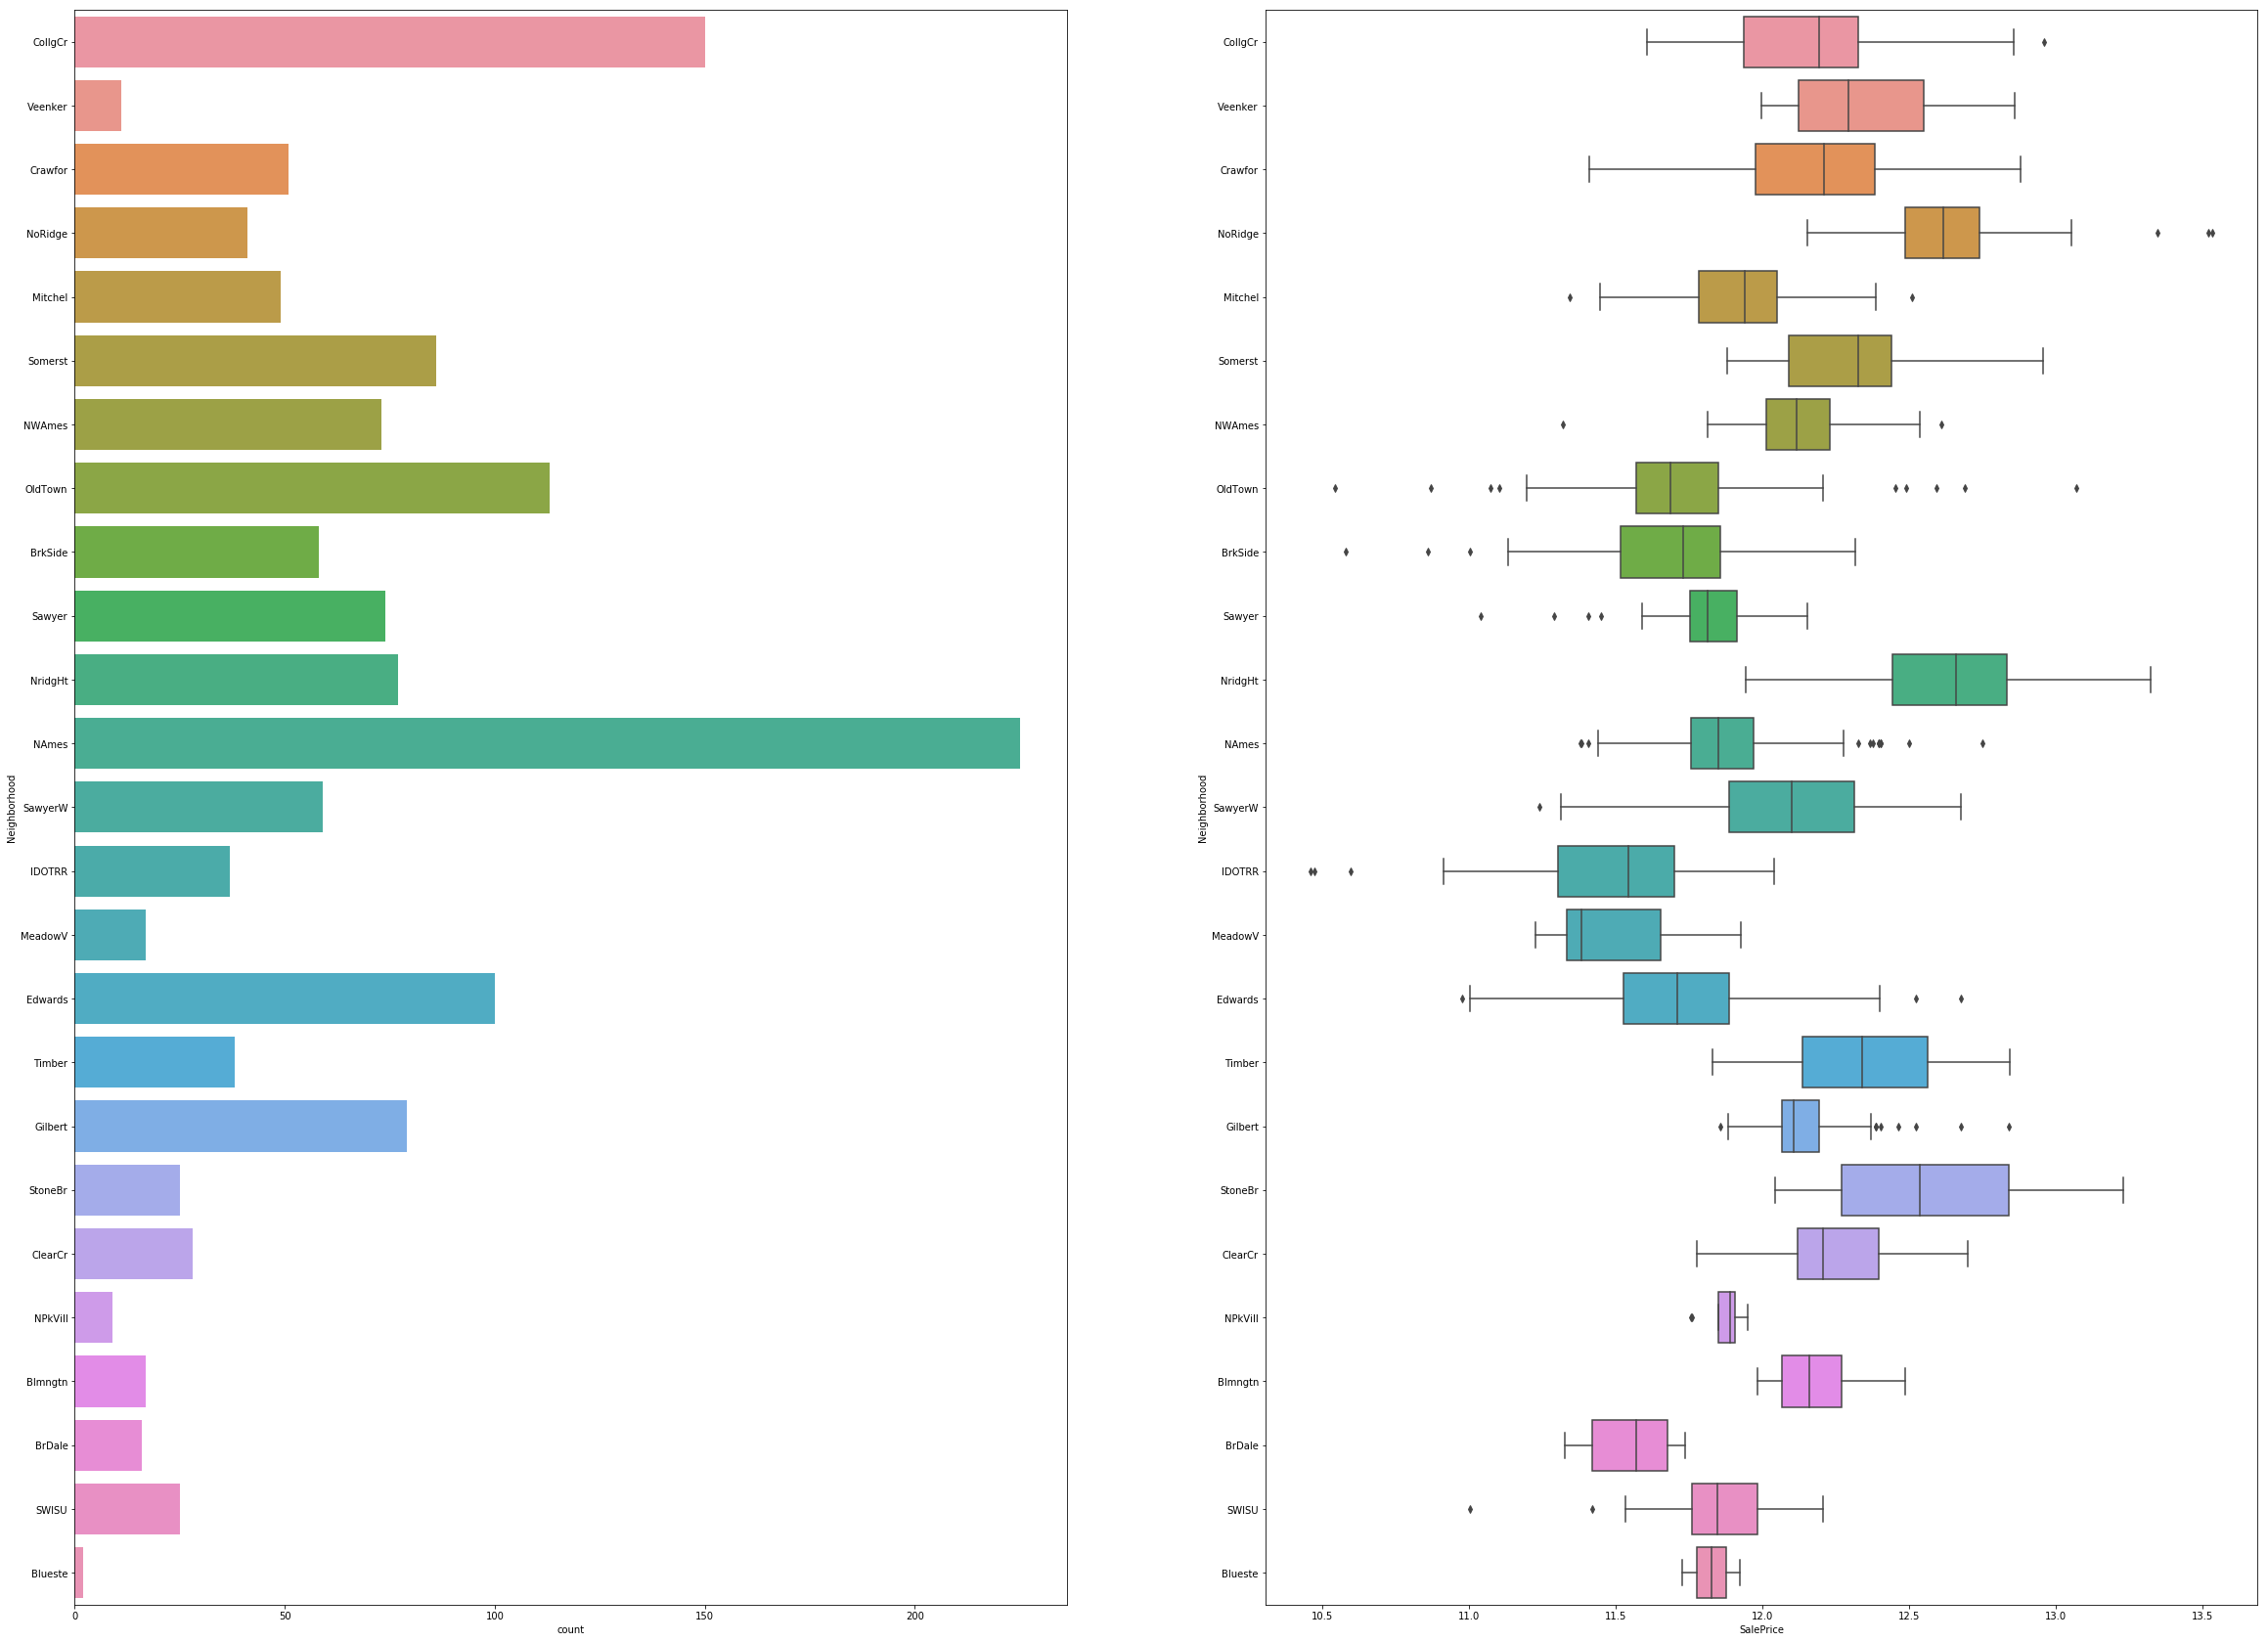

Value count of Neighborhood


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [57]:
plt.figure(figsize=(40,30))
plt.subplot(121)
sns.countplot(y=sale_data['Neighborhood'])
plt.subplot(122)
sns.boxplot(y=sale_data['Neighborhood'], x=sale_data['SalePrice'])
plt.show()

print('Value count of Neighborhood')
sale_data['Neighborhood'].value_counts()

In [58]:
#I see that houses in North Ames and College Creek are more in demand in market.

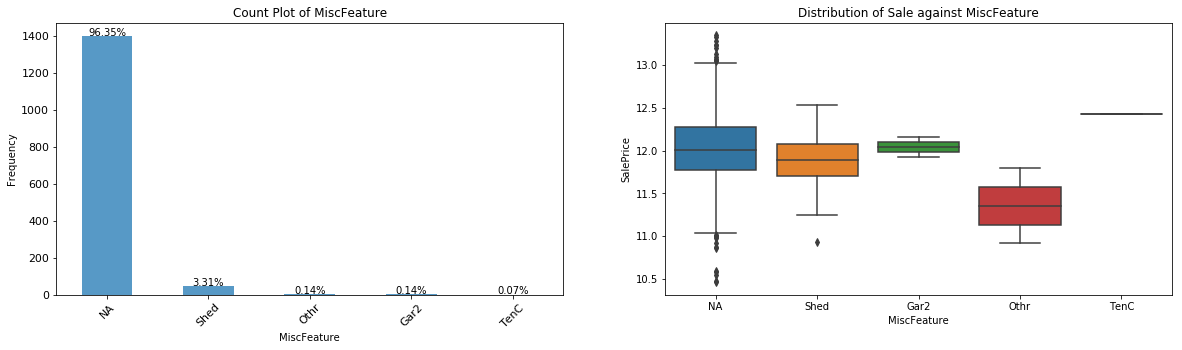

In [59]:
analysis('MiscFeature')

#I see that Over 96% of data doesn't contain anything in miscellaneous features. only 4% of data has some features included.
which also can be represented by MiscVal so, I will drop this column.

In [60]:
clean_sale_data.drop('MiscFeature',axis=1,inplace=True)  #Put in charts

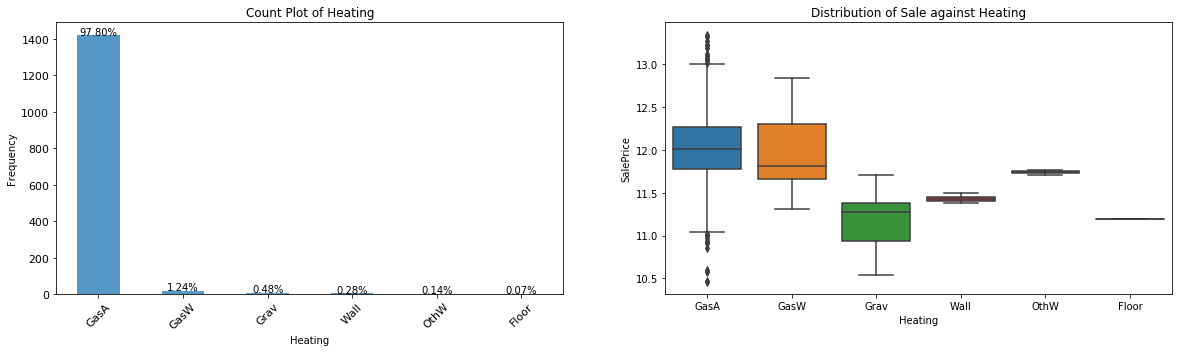

In [61]:
analysis('Heating')

In [62]:
#I see that almost 98% of Heating column has GasA as value and other values form only 2% of data. 
#So, I will replace them with value 'others'.

clean_sale_data['Heating'] =clean_sale_data['Heating'].apply(lambda x: 'Others' if x not in ['GasA'] else x)

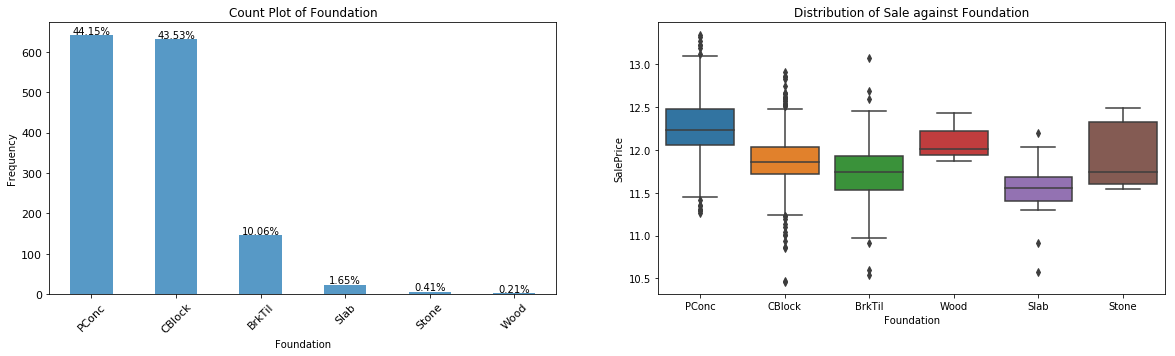

In [63]:
analysis('Foundation')

In [64]:
#I see that Foundations value - 'Slab', 'Stone' and 'Wood' only makes 2% of data in that column. 
#So, I will replace these values with others.
clean_sale_data['Foundation'] =clean_sale_data['Foundation'].apply(lambda x: 'Others' if x in ['Slab', 'Stne', 'Wood'] else x)

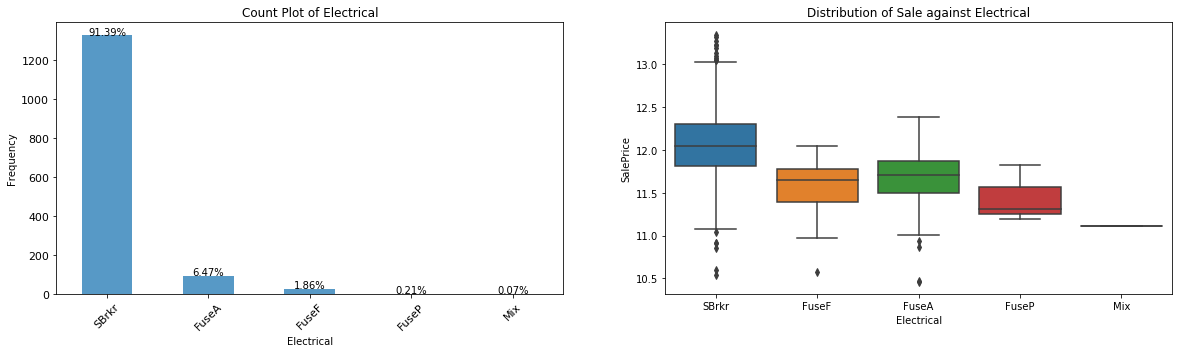

In [65]:
analysis('Electrical')

In [66]:
#Insights - I will replace 'FuseF', 'FuseP' and 'Mix' values with Others as together they form a very tiny part of our dataset.
clean_sale_data['Electrical'] =clean_sale_data['Electrical'].apply(lambda x: 'Others' if x in ['FuseF', 'FuseP', 'Mix'] else x)

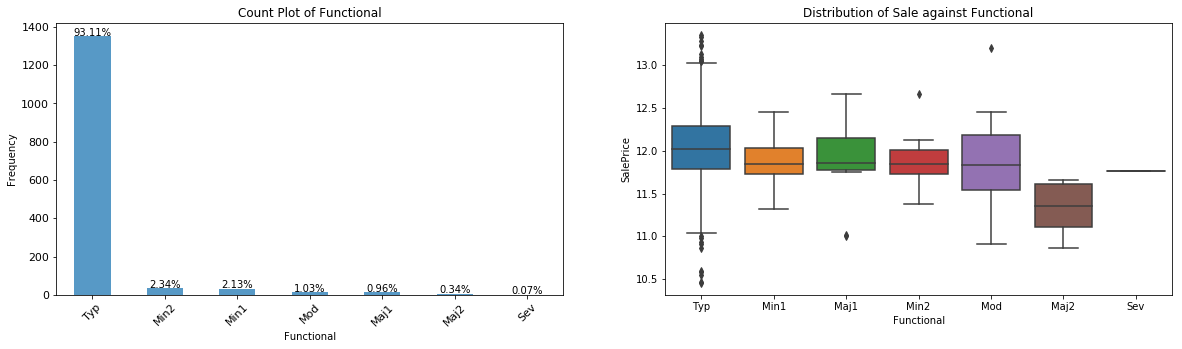

In [67]:
analysis('Functional')

In [68]:
#Insights - I will replace 'Maj1', 'Maj2' and 'Sev' values with Others as together they form a very small part of our dataset.
clean_sale_data['Functional'] =clean_sale_data['Functional'].apply(lambda x: 'Others' if x in ['Maj1', 'Maj2', 'Sev'] else x)

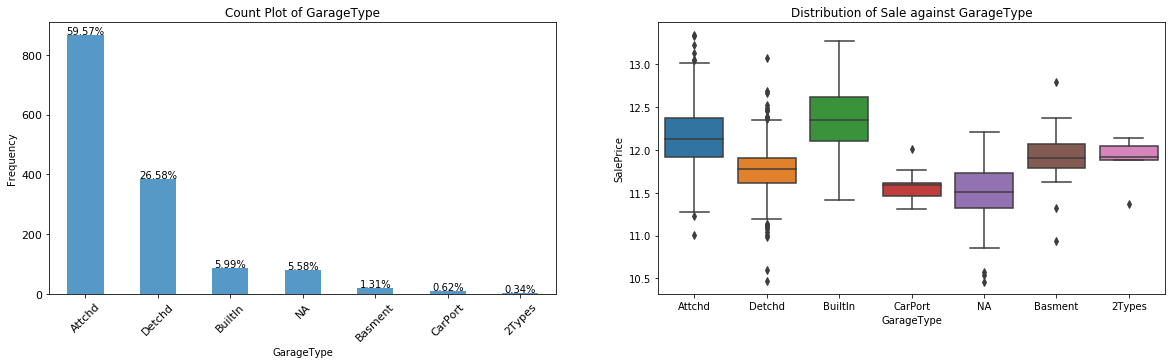

In [69]:
analysis('GarageType')

In [70]:
#Insights - I will replace 'Basment', 'CarPool' and '2Types' values with Others as together they form a very small part of our dataset.
clean_sale_data['GarageType'] =clean_sale_data['GarageType'].apply(lambda x: 'Others' if x in ['Basment', 'CarPool', '2Types'] else x)

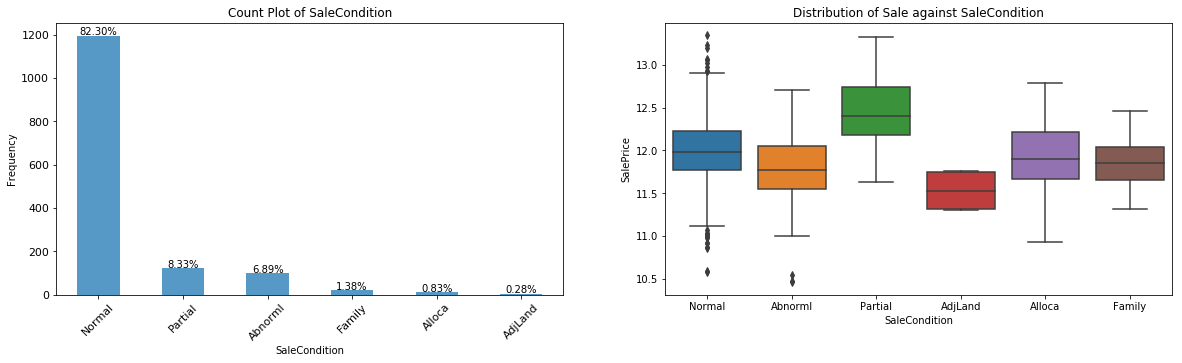

In [71]:
analysis('SaleCondition')

In [72]:
#Insights - I will replace 'Family', 'Alloca' and 'AdjLand' values with Others as together they form a very small part of our dataset.
clean_sale_data['SaleCondition'] =clean_sale_data['SaleCondition'].apply(lambda x: 'Others' if x in ['Family', 'Alloca', 'AdjLand'] else x)

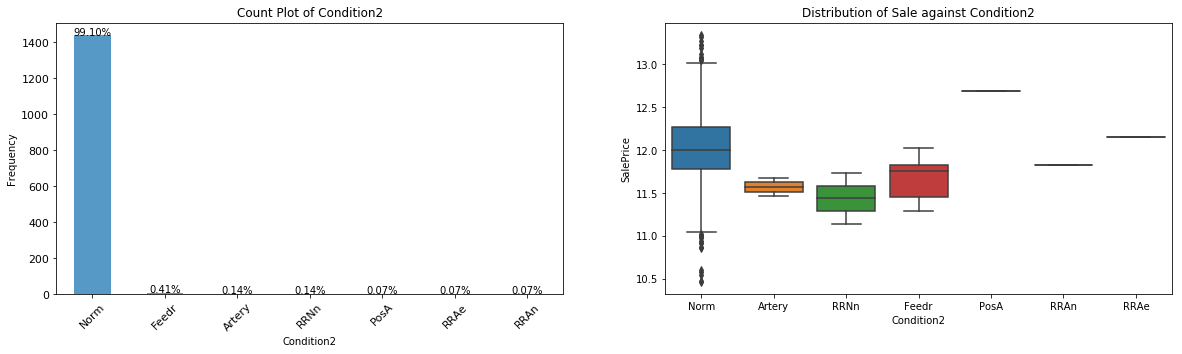

In [73]:
analysis('Condition2')

In [74]:
#Insights - This feature has 'Norm' as a value for 99% of its data. As teh column doesn't provide us any insight, I will just drop this column.
clean_sale_data.drop('Condition2', axis=1, inplace=True)

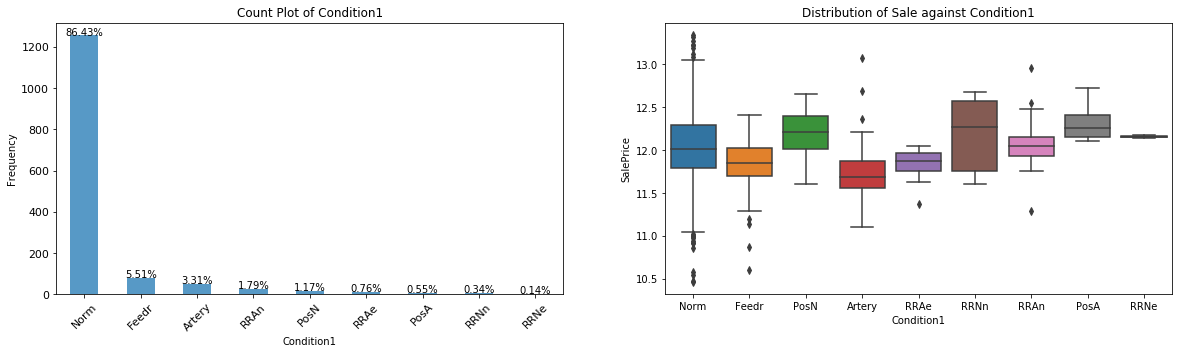

In [75]:
analysis('Condition1')

In [76]:
#Insights - I will replace 'Family', 'Alloca' and 'AdjLand' values with Others as together they form a very small part of our dataset.
clean_sale_data['Condition1'] =clean_sale_data['Condition1'].apply(lambda x: 'Others' if x in ['RRAe', 'PosA', 'RRNn','RRNe'] else x)

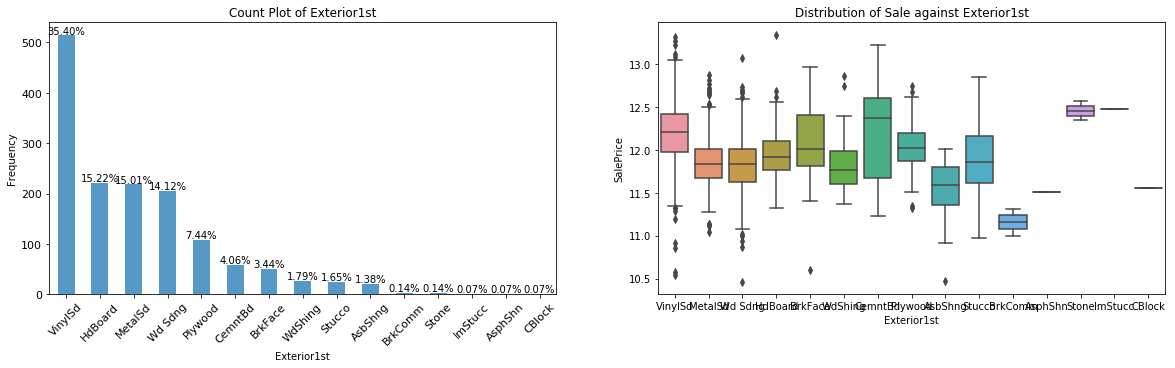

In [77]:
analysis('Exterior1st')

In [78]:
#Insights - I will replace 'AsbShng', 'Stone', 'ImStucc', 'CBlock', 'AsphShn', 'WdShing', 'Stucco' and 'BrkComm' values with Others as together they form a very small part of our dataset.
clean_sale_data['Exterior1st'] =clean_sale_data['Exterior1st'].apply(lambda x: 'Others' if x in ['AsbShng', 'Stone', 'ImStucc','CBlock', 'AsphShn', 'BrkComm', 'WdShing', 'Stucco'] else x)

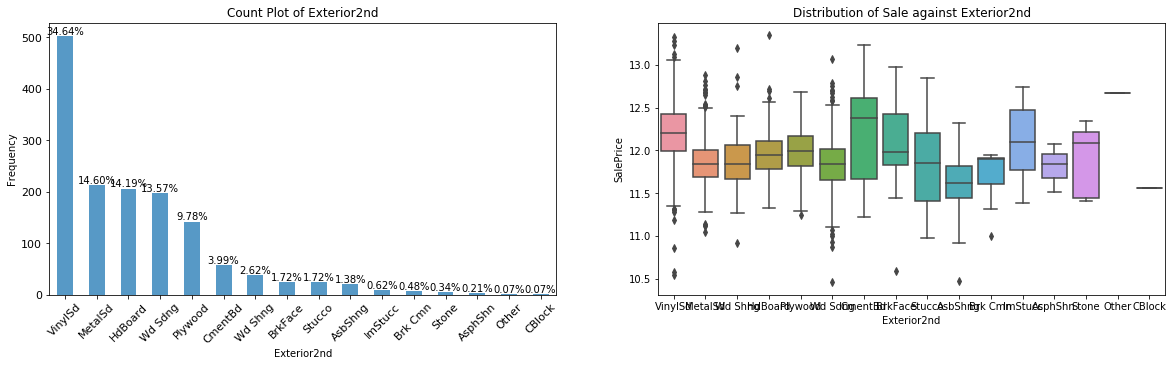

In [79]:
analysis('Exterior2nd')

In [80]:
#Insights - I will replace 'AsbShng', 'Stone', 'ImStucc', 'CBlock', 'AsphShn', 'WdShing', 'Stucco' and 'BrkComm' values with Others as together they form a very small part of our dataset.
clean_sale_data['Exterior2nd'] =clean_sale_data['Exterior2nd'].apply(lambda x: 'Others' if x in ['AsbShng', 'Stone', 'CBlock','AsphShn', 'Other','AsphShn', 'Brk Cmn','WdShing', 'Stucco'] else x)

### Data Preparation for Modelling:

In [81]:
#Feature Engineering

In [82]:
#I see that we have lots of Year columns in our dataset. But really matters to us is age of that house or Garage.
#Also, I will calculate age from max year available in our dataset which is 2010.

#1 thing to note here is that garageYrBlt has some 0 values which represent that garage is not available in house.
#If I keep it as numeric variable, it may mess up during scaling, so I will create bins and make it a ctegorical variable.
clean_sale_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003,2008
1,1976,1976,1976,2007
2,2001,2002,2001,2008
3,1915,1970,1998,2006
4,2000,2000,2000,2008


In [83]:
max_built=clean_sale_data['YearBuilt'].max()
max_remodel = clean_sale_data['YearRemodAdd'].max()
max_garage_built = clean_sale_data['GarageYrBlt'].max()
max_sold = clean_sale_data['YrSold'].max()
max_year = max(max_built, max_remodel, max_garage_built, max_sold)
clean_sale_data['BuiltAge']=clean_sale_data['YearBuilt'].apply(lambda x: max_year - x if(x!=0) else -1)
clean_sale_data['RemodelAge']=clean_sale_data['YearRemodAdd'].apply(lambda x: max_year - x if(x!=0) else -1)
clean_sale_data['SoldAge'] = clean_sale_data['YrSold'].apply(lambda x: max_year - x if(x!=0) else -1)

clean_sale_data['GarageAge'] = clean_sale_data['GarageYrBlt'].apply(lambda x: "No Garage" if(x==0) else ("less than 10" if(x>2000)  else ("less than 20" if(x>1990) else("less than 50" if(x>1960) else("less than 80" if(x>1930) else("more than 80"))))))

clean_sale_data[['BuiltAge','RemodelAge','SoldAge','GarageAge']].head()


,BuiltAge,RemodelAge,SoldAge,GarageAge
0,7,7,2,less than 10
1,34,34,3,less than 50
2,9,8,2,less than 10
3,95,40,4,less than 20
4,10,10,2,less than 20


In [84]:
#Lets now drop original year columns
clean_sale_data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)
clean_sale_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuiltAge,RemodelAge,SoldAge
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.866391,69.485537,10423.870523,6.088154,5.579201,100.931129,436.269972,46.805785,566.163912,1049.239669,1155.721763,344.479339,5.876722,1506.077824,0.057163,2.865702,1.046832,0.608815,469.276860,93.660468,46.241736,22.075069,3.428375,15.143939,2.061295,43.342975,12.021571,38.832645,25.182507,2.183196
std,42.244424,20.844518,9854.553261,1.363276,1.113755,176.153090,428.970804,161.726239,440.835599,410.962170,368.012991,431.745669,48.754995,496.800313,0.238094,0.816277,0.220918,0.640795,207.689509,124.963773,65.417464,61.265602,29.396943,55.899665,35.432345,497.294797,0.395405,30.196991,20.640045,1.330672
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7526.250000,5.000000,5.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,0.000000,2.000000,1.000000,0.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.774528,10.000000,6.000000,1.000000
50%,50.000000,69.000000,9452.500000,6.000000,5.000000,0.000000,381.000000,0.000000,477.500000,990.000000,1086.000000,0.000000,0.000000,1458.000000,0.000000,3.000000,1.000000,1.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.001205,38.000000,16.500000,2.000000
75%,70.000000,78.250000,11515.500000,7.000000,6.000000,162.250000,706.000000,0.000000,806.500000,1291.500000,1383.000000,728.000000,0.000000,1774.250000,0.000000,3.000000,1.000000,1.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.271982,56.000000,43.250000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,1818.000000,572.000000,3627.000000,2.000000,8.000000,3.000000,3.000000,1166.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,13.345509,138.000000,60.000000,4.000000


In [85]:
#Visualize Categorical features
clean_sale_data.select_dtypes(include='object').head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,GarageAge
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,less than 10
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,less than 50
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,less than 10
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,WD,Abnorml,less than 20
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,less than 20


I see that there are lots of Ordinal variable available in our dataset. SO, rather than creating Dummies for them, I can use OneHotEncodign to scale them.
List of Ordinal Variables is:
- LotShape
- LandSlope
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- CentralAir
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond

In [86]:
#let's keep aside numerical columns to scale
num_cols_to_scale = clean_sale_data.select_dtypes(exclude='object').columns.to_list()
len(num_cols_to_scale)

30

In [87]:
bkp_clean_sale_data = clean_sale_data.copy() #Create a backup

In [88]:
#Convert Rating Columns to Numeric columns
clean_sale_data['ExterQual'] = clean_sale_data['ExterQual'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['ExterCond'] = clean_sale_data['ExterCond'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['BsmtQual'] = clean_sale_data['BsmtQual'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['BsmtCond'] = clean_sale_data['BsmtCond'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['HeatingQC'] = clean_sale_data['HeatingQC'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['KitchenQual'] = clean_sale_data['KitchenQual'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['FireplaceQu'] = clean_sale_data['FireplaceQu'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['GarageQual'] = clean_sale_data['GarageQual'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)
clean_sale_data['GarageCond'] = clean_sale_data['GarageCond'].apply(lambda x: pd.Series(x).map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}) if x in ['NA','Po','Fa','TA','Gd','Ex'] else x)


clean_sale_data['CentralAir'] = clean_sale_data['CentralAir'].apply(lambda x: pd.Series(x).map({'N':0, 'Y':1}) if x in ['N','Y'] else x)
clean_sale_data['BsmtFinType1'] = clean_sale_data['BsmtFinType1'].apply(lambda x: pd.Series(x).map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6}) if x in ['NA','Unf','LwQ','Rec','BLQ','ALQ', 'GLQ'] else x)
clean_sale_data['BsmtFinType2'] = clean_sale_data['BsmtFinType2'].apply(lambda x: pd.Series(x).map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6}) if x in ['NA','Unf','LwQ','Rec','BLQ','ALQ', 'GLQ'] else x)

In [89]:
#I see that there are 3 different variables 1stFlrSF, 2ndFlrSF and TotalBsmtSF which represents floor area of 1st, 2nd florr and basement.
#Lets create a sibgle variable which represents total square feet area as business will be able to understand that better.
clean_sale_data['TotalSF'] = clean_sale_data['1stFlrSF'] + clean_sale_data['2ndFlrSF'] + clean_sale_data['TotalBsmtSF']
clean_sale_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,BuiltAge,RemodelAge,SoldAge,GarageAge,TotalSF
0,60,RL,65,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,No,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,0,3,1,4,Typ,0,0,Attchd,RFn,548,3,3,Y,0,61,0,0,0,0,NA,0,WD,Normal,12.247699,7,7,2,less than 10,2566
1,20,RL,80,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4,3,Gd,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,1,3,1,3,Typ,1,3,Attchd,RFn,460,3,3,Y,298,0,0,0,0,0,NA,0,WD,Normal,12.109016,34,34,3,less than 50,2524
2,60,RL,68,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,3,Mn,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,0,3,1,4,Typ,1,3,Attchd,RFn,608,3,3,Y,0,42,0,0,0,0,NA,0,WD,Normal,12.317171,9,8,2,less than 10,2706
3,70,RL,60,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,4,No,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,0,3,1,4,Typ,1,4,Detchd,Unf,642,3,3,Y,0,35,272,0,0,0,NA,0,WD,Abnorml,11.849405,95,40,4,less than 20,2473
4,60,RL,84,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,Av,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,0,4,1,4,Typ,1,3,Attchd,RFn,836,3,3,Y,192,84,0,0,0,0,NA,0,WD,Normal,12.429220,10,10,2,less than 20,3343


In [90]:
#Lets drop original columns now
clean_sale_data.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)


In [91]:
cat_cols = list(clean_sale_data.select_dtypes(include='object').columns)
cat_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition',
 'GarageAge']

In [92]:
#I see that MSSubClass is actually a categorical column
clean_sale_data['MSSubClass'] = clean_sale_data['MSSubClass'].apply(lambda x: 'MSSubClass_'+str(x))
clean_sale_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,BuiltAge,RemodelAge,SoldAge,GarageAge,TotalSF
0,MSSubClass_60,RL,65,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,No,6,706,1,0,150,GasA,5,1,SBrkr,0,1710,0,3,1,4,Typ,0,0,Attchd,RFn,548,3,3,Y,0,61,0,0,0,0,NA,0,WD,Normal,12.247699,7,7,2,less than 10,2566
1,MSSubClass_20,RL,80,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4,3,Gd,5,978,1,0,284,GasA,5,1,SBrkr,0,1262,1,3,1,3,Typ,1,3,Attchd,RFn,460,3,3,Y,298,0,0,0,0,0,NA,0,WD,Normal,12.109016,34,34,3,less than 50,2524
2,MSSubClass_60,RL,68,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,3,Mn,6,486,1,0,434,GasA,5,1,SBrkr,0,1786,0,3,1,4,Typ,1,3,Attchd,RFn,608,3,3,Y,0,42,0,0,0,0,NA,0,WD,Normal,12.317171,9,8,2,less than 10,2706
3,MSSubClass_70,RL,60,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,4,No,5,216,1,0,540,GasA,4,1,SBrkr,0,1717,0,3,1,4,Typ,1,4,Detchd,Unf,642,3,3,Y,0,35,272,0,0,0,NA,0,WD,Abnorml,11.849405,95,40,4,less than 20,2473
4,MSSubClass_60,RL,84,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,Av,6,655,1,0,490,GasA,5,1,SBrkr,0,2198,0,4,1,4,Typ,1,3,Attchd,RFn,836,3,3,Y,192,84,0,0,0,0,NA,0,WD,Normal,12.429220,10,10,2,less than 20,3343


In [93]:
clean_sale_data['TotalPorchSF'] = clean_sale_data['OpenPorchSF'] + clean_sale_data['EnclosedPorch'] + clean_sale_data['3SsnPorch']+ clean_sale_data['ScreenPorch']
clean_sale_data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [94]:
sale_data_to_scale = clean_sale_data.copy()

In [95]:
cat_cols = list(sale_data_to_scale.select_dtypes(include='object').columns)
dummies_cat_data = pd.get_dummies(sale_data_to_scale[cat_cols],drop_first=True)
dummies_cat_data.head()

,MSSubClass_MSSubClass_160,MSSubClass_MSSubClass_180,MSSubClass_MSSubClass_190,MSSubClass_MSSubClass_20,MSSubClass_MSSubClass_30,MSSubClass_MSSubClass_40,MSSubClass_MSSubClass_45,MSSubClass_MSSubClass_50,MSSubClass_MSSubClass_60,MSSubClass_MSSubClass_70,MSSubClass_MSSubClass_75,MSSubClass_MSSubClass_80,MSSubClass_MSSubClass_85,MSSubClass_MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,Heating_Others,Electrical_Others,Electrical_SBrkr,Functional_Min2,Functional_Mod,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,GarageAge_less than 10,GarageAge_less than 20,GarageAge_less than 50,GarageAge_less than 80,GarageAge_more than 80
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,

In [96]:
scaled_sale_data = pd.concat([sale_data_to_scale,dummies_cat_data], axis=1)
scaled_sale_data.drop(cat_cols, axis=1, inplace=True)
scaled_sale_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,MiscVal,SalePrice,BuiltAge,RemodelAge,SoldAge,TotalSF,TotalPorchSF,MSSubClass_MSSubClass_160,MSSubClass_MSSubClass_180,MSSubClass_MSSubClass_190,MSSubClass_MSSubClass_20,MSSubClass_MSSubClass_30,MSSubClass_MSSubClass_40,MSSubClass_MSSubClass_45,MSSubClass_MSSubClass_50,MSSubClass_MSSubClass_60,MSSubClass_MSSubClass_70,MSSubClass_MSSubClass_75,MSSubClass_MSSubClass_80,MSSubClass_MSSubClass_85,MSSubClass_MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,Heating_Others,Electrical_Others,Electrical_SBrkr,Functional_Min2,Functional_Mod,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,GarageAge_less than 10,GarageAge_less than 20,GarageAge_less than 50,GarageAge_less than 80,GarageAge_more than 80
0,65,8450,7,5,196,4,3,4,3,6,706,1,0,150,5,1,0,1710,0,3,1,4,0,0,548,3,3,0,0,0,12.247699,7,7,2,2566,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
1,80,9600,6,8,0,3,3,4,3,5,978,1,0,284,5,1,0,1262,1,3,1,3,1,3,460,3,3,298,0,0,12.109016,34,34,3,2524,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,68,11250,7,5,162,4,3,4,3,6,486,1,0,434,5,1,0,1786,0,3,1,4,1,3,608,3,3,0,0,0,12.317171,9,8,2,2706,42,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

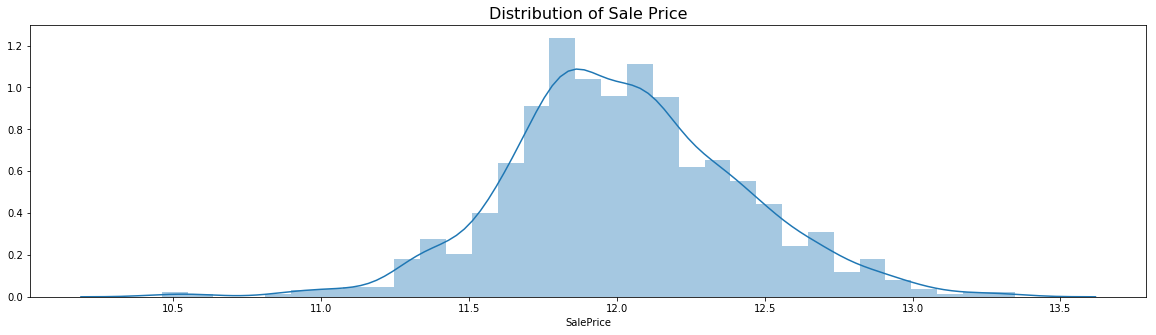

In [97]:
#Lets Check Distribution of target variable before scaling
plt.figure(figsize=(20,5))
sns.distplot(scaled_sale_data['SalePrice'])
plt.title('Distribution of Sale Price', fontsize=16)
plt.show()

In [98]:
removed_cols = ['2ndFlrSF', 'MSSubClass', '3SsnPorch', '1stFlrSF', 'EnclosedPorch', 'OpenPorchSF', 'ScreenPorch', 'TotalBsmtSF','OverallCond']
skewed_col = [x for x in num_cols_to_scale if x not in removed_cols]

In [99]:
#Lets treat highly skewed numerical features
skew_df = pd.DataFrame(scaled_sale_data[skewed_col].skew().abs(),columns=['Skew'])
skewed_col = skew_df[skew_df['Skew']>0.5].index.to_list()
scaled_sale_data[skewed_col] = np.log1p(scaled_sale_data[skewed_col])
scaled_sale_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,MiscVal,SalePrice,BuiltAge,RemodelAge,SoldAge,TotalSF,TotalPorchSF,MSSubClass_MSSubClass_160,MSSubClass_MSSubClass_180,MSSubClass_MSSubClass_190,MSSubClass_MSSubClass_20,MSSubClass_MSSubClass_30,MSSubClass_MSSubClass_40,MSSubClass_MSSubClass_45,MSSubClass_MSSubClass_50,MSSubClass_MSSubClass_60,MSSubClass_MSSubClass_70,MSSubClass_MSSubClass_75,MSSubClass_MSSubClass_80,MSSubClass_MSSubClass_85,MSSubClass_MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,Heating_Others,Electrical_Others,Electrical_SBrkr,Functional_Min2,Functional_Mod,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,GarageAge_less than 10,GarageAge_less than 20,GarageAge_less than 50,GarageAge_less than 80,GarageAge_more than 80
0,4.189655,9.042040,7,5,5.283204,4,3,4,3,6,6.561031,1,0.0,5.017280,5,1,0.0,7.444833,0.000000,3,0.693147,4,0.000000,0,548,3,3,0.000000,0.0,0.0,12.247699,2.079442,2.079442,2,2566,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
1,4.394449,9.169623,6,8,0.000000,3,3,4,3,5,6.886532,1,0.0,5.652489,5,1,0.0,7.141245,0.693147,3,0.693147,3,0.693147,3,460,3,3,5.700444,0.0,0.0,12.109016,3.555348,3.555348,3,2524,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,4.234107,9.328212,7,5,5.093750,4,3

In [100]:
#List Numerical Features to Scale as we don't want to scale features like Quality of something
num_cols_to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'BuiltAge','RemodelAge', 'SoldAge','SoldAge','TotalSF','LowQualFinSF','PoolArea','MiscVal', 'TotalPorchSF','SalePrice']

In [101]:
#Split scaled_sale_data into train and test dataframes
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(scaled_sale_data, train_size=0.7, test_size=0.3, random_state=42)
print('Shape of Train dataset is: ',df_train.shape)
print('Shape of Test dataset is: ',df_test.shape)

Shape of Train dataset is:  (1016, 181)
Shape of Test dataset is:  (436, 181)


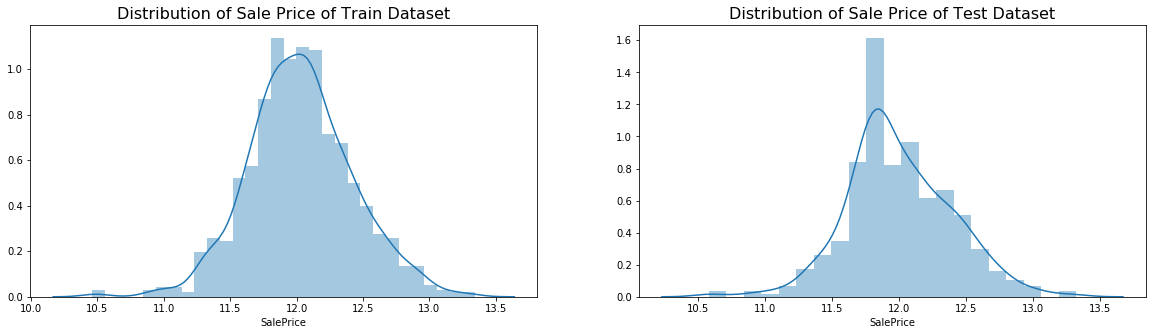

In [102]:
#Lets see distribution of SalePrice of train and test dataset to verify its distribution after splitting and scaling original dataset.
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df_train['SalePrice'])
plt.title('Distribution of Sale Price of Train Dataset', fontsize=16)
plt.subplot(122)
sns.distplot(df_test['SalePrice'])
plt.title('Distribution of Sale Price of Test Dataset', fontsize=16)
plt.show()

# Model Building and Evaluation

In [103]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_train[num_cols_to_scale] = scaler.fit_transform(df_train[num_cols_to_scale])
df_test[num_cols_to_scale] = scaler.transform(df_test[num_cols_to_scale])

In [104]:
y_train = df_train.pop('SalePrice')
X_train = df_train.copy()

y_test = df_test.pop('SalePrice')
X_test = df_test.copy()

In [105]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,MiscVal,BuiltAge,RemodelAge,SoldAge,TotalSF,TotalPorchSF,MSSubClass_MSSubClass_160,MSSubClass_MSSubClass_180,MSSubClass_MSSubClass_190,MSSubClass_MSSubClass_20,MSSubClass_MSSubClass_30,MSSubClass_MSSubClass_40,MSSubClass_MSSubClass_45,MSSubClass_MSSubClass_50,MSSubClass_MSSubClass_60,MSSubClass_MSSubClass_70,MSSubClass_MSSubClass_75,MSSubClass_MSSubClass_80,MSSubClass_MSSubClass_85,MSSubClass_MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,Heating_Others,Electrical_Others,Electrical_SBrkr,Functional_Min2,Functional_Mod,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,GarageAge_less than 10,GarageAge_less than 20,GarageAge_less than 50,GarageAge_less than 80,GarageAge_more than 80
435,-1.712340,0.242935,7,6,0.000000,1.0,3,4,3,6,0.001983,5,5.843544,-1.534478,5,1,0.0,0.291597,0.0,3,0.693147,4,0.693147,3,0.298826,3,3,0.988110,0.0,0.0,-0.548997,-0.068087,-0.5,-0.029843,0.078571,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1295,0.052312,-0.296844,5,5,1.004099,0.0,3,3,3,4,0.149300,1,0.000000,-2.055252,4,1,0.0,-0.749088,0.0,3,0.693147,3,0.000000,0,-0.819637,3,3,1.145780,0.0,0.0,0.056099,0.504813,1.0,-0.396192,-0.357143,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
624,0.5382

In [106]:
X_train.shape

(1016, 180)

I see that I have only 1016 records only in train dataset and 436 records in test dataset, I can not split train dataset anymore for validation dataset.
So, I will apply cross validation technique so that even with a smaller train dataset, my model can learn in a pretty decent way.


In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
       

## Ridge Regression

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0, 50.0, 100.0, 200.0]}
ridge =Ridge()
#cross-valiadtion
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid=hyper_param,
                        scoring = 'neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015391,0.014885,0.001599,0.000490,0.001,{'alpha': 0.001},-0.192812,-0.177996,-0.169000,-0.152748,-0.164345,-0.171402,0.013467,8,-0.120727,-0.126088,-0.129838,-0.130742,-0.129329,-0.127345,0.003663
1,0.008396,0.001019,0.001599,0.000800,0.01,{'alpha': 0.01},-0.192530,-0.177732,-0.168649,-0.152481,-0.163934,-0.171086,0.013480,7,-0.120748,-0.126093,-0.129875,-0.130712,-0.129371,-0.127360,0.003659
2,0.009196,0.000979,0.002198,0.000400,0.1,{'alpha': 0.1},-0.190368,-0.175839,-0.165978,-0.150575,-0.160893,-0.168752,0.013555,6,-0.120974,-0.126157,-0.130186,-0.130484,-0.129635,-0.127487,0.003608
3,0.007795,0.001165,0.001599,0.000490,1,{'alpha': 1.0},-0.184917,-0.170159,-0.156648,-0.149419,-0.151784,-0.162607,0.013289,3,-0.123143,-0.128653,-0.132005,-0.131568,-0.132100,-0.129494,0.003419
4,0.008196,0.001599,0.001599,0.000799,5,{'alpha': 5.0},-0.187044,-0.164857,-0.148204,-0.153569,-0.150146,-0.160790,0.014367,1,-0.127941,-0.133224,-0.136983,-0.135776,-0.137815,-0.134348,0.003559
5,0.007596,0.000489,0.001599,0.000490,10,{'alpha': 10.0},-0.189685,-0.162365,-0.145795,-0.156000,-0.153082,-0.161413,0.015137,2,-0.131163,-0.136857,-0.140679,-0.138920,-0.140690,-0.137662,0.003542
6,0.009795,0.000748,0.002198,0.000400,20,{'alpha': 20.0},-0.193956,-0.161603,-0.145831,-0.158201,-0.156443,-0.163237,0.016274,4,-0.135869,-0.141985,-0.146301,-0.143637,-0.144377,-0.142434,0.003563
7,0.010196,0.001941,0.002197,0.000746,50,{'alpha': 50.0},-0.201554,-0.164596,-0.149989,-0.161905,-0.162179,-0.168078,0.017532,5,-0.144344,-0.151048,-0.155775,-0.153137,-0.152544,-0.151370,0.003831
8,0.008195,0.000747,0.001600,0.000491,100,{'alpha': 100.0},-0.208248,-0.168045,-0.155778,-0.168239,-0.165807,-0.173258,0.018123,9,-0.152430,-0.160326,-0.164574,-0.161652,-0.161313,-0.160059,0.004069
9,0.006796,0.001166,0.001399,0.000489,200,{'alpha': 200.0},-0.215472,-0.173555,-0.164916,-0.178065,-0.168986,-0.180234,0.018202,10,-0.162332,-0.171012,-0.174694,-0.172031,-0.171855,-0.170385,0.004212


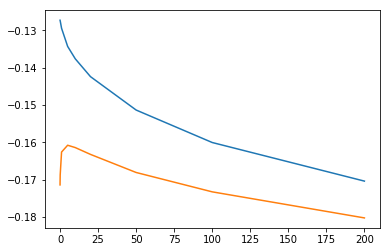

In [111]:
#plotting neg mean train and test score with alpha
#plt.figure(figsize=(20,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.show()

In [112]:
model_cv.best_params_

{'alpha': 5.0}

In [113]:
#Putting alpha = 5 and create Ridge Regression Model
ridge = Ridge(alpha =5)
ridge.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_train_pred = ridge.predict(X_train)
print('Train r2 score: ', r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print('Test r2 score: ',r2_score(y_test,y_test_pred))


Train r2 score:  0.9393610638099665
Test r2 score:  0.9212661571800584


In [114]:
#Lets Now See Important Factors and their coefficients from Ridge Regression

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coefficient']
sorted_ridge_v1 = ridge_coef.sort_values(by='Coefficient', ascending=False)
sorted_ridge_v1

,Feature,Coefficient
18,BsmtHalfBath,0.233132
34,TotalPorchSF,0.221519
173,SaleCondition_Others,0.179019
170,SaleType_Oth,0.171857
87,Neighborhood_Timber,0.169992
71,Neighborhood_Edwards,0.166492
52,MSZoning_RM,0.144962
51,MSZoning_RL,0.144927
16,LowQualFinSF,0.122647
116,Exterior1st_CemntBd,0.116634


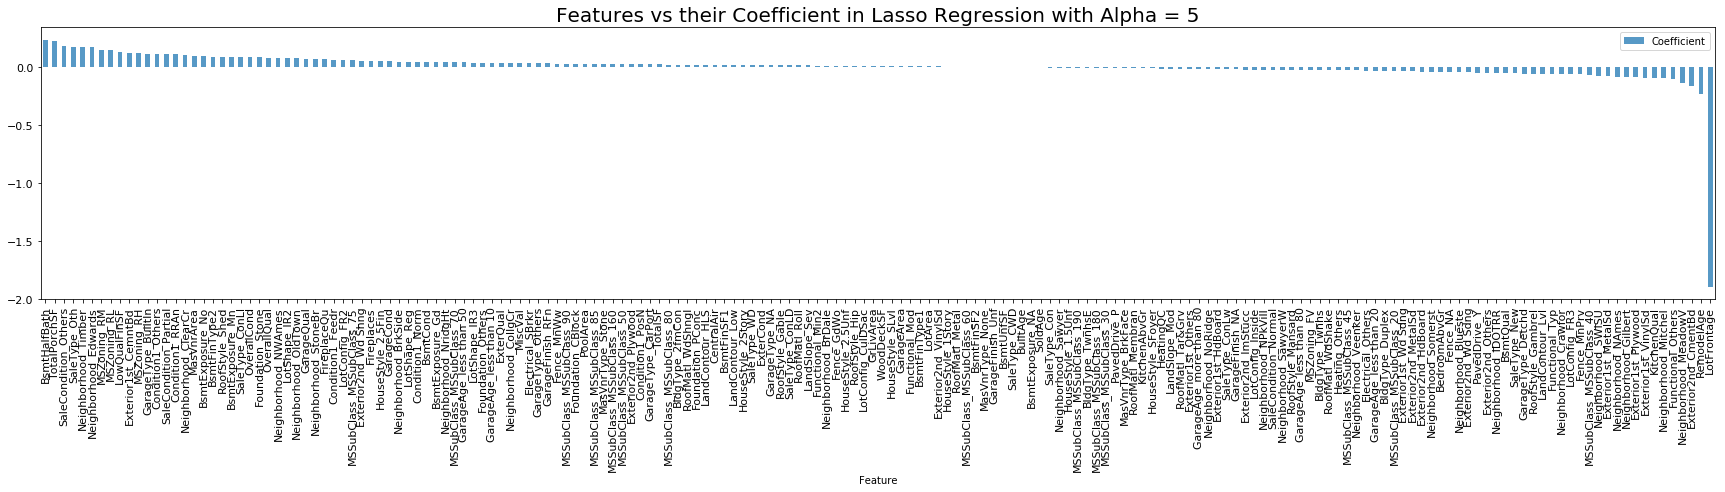

In [115]:
#Lets plot Features with their Coefficient Values
sorted_ridge_v1.set_index('Feature',inplace=True)
sorted_ridge_v1.plot(kind='bar',figsize=(30,5),alpha=0.75,fontsize = 11)
plt.title('Features vs their Coefficient in Lasso Regression with Alpha = 5', fontsize=20)
plt.show()

In [116]:
#Features Produced by Ridge Regression with alpha: 5
ridge_coef.shape[0]

180

#There are 180 features to be considered if we use Ridge Regression with alpha value = 10 and that too if I consider only those features whose coefficients are >0.01 or less than -0.01

In [117]:
#Lets see if I double the value of alpha for Ridge Regression

ridge_2 = Ridge(alpha =10)
ridge_2.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_train_pred = ridge_2.predict(X_train)
print('Train r2 score: ',r2_score(y_train,y_train_pred))

y_test_pred = ridge_2.predict(X_test)
print('Test r2 score: ',r2_score(y_test,y_test_pred))

model_parameter = list(ridge_2.coef_)
model_parameter.insert(0,ridge_2.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coefficient']
sorted_ridge_v2 = ridge_coef.sort_values(by='Coefficient', ascending=False)
print('Total Number of Features to be considered:', ridge_coef.shape[0])

Train r2 score:  0.936712976973077
Test r2 score:  0.9225376537399425
Total Number of Features to be considered: 180


In [118]:
sorted_ridge_v2

,Feature,Coefficient
34,TotalPorchSF,2.236904e-01
18,BsmtHalfBath,2.220487e-01
173,SaleCondition_Others,1.608741e-01
71,Neighborhood_Edwards,1.461564e-01
87,Neighborhood_Timber,1.329350e-01
170,SaleType_Oth,1.326794e-01
16,LowQualFinSF,1.126370e-01
150,GarageType_BuiltIn,1.047136e-01
52,MSZoning_RM,1.025616e-01
4,MasVnrArea,9.376538e-02


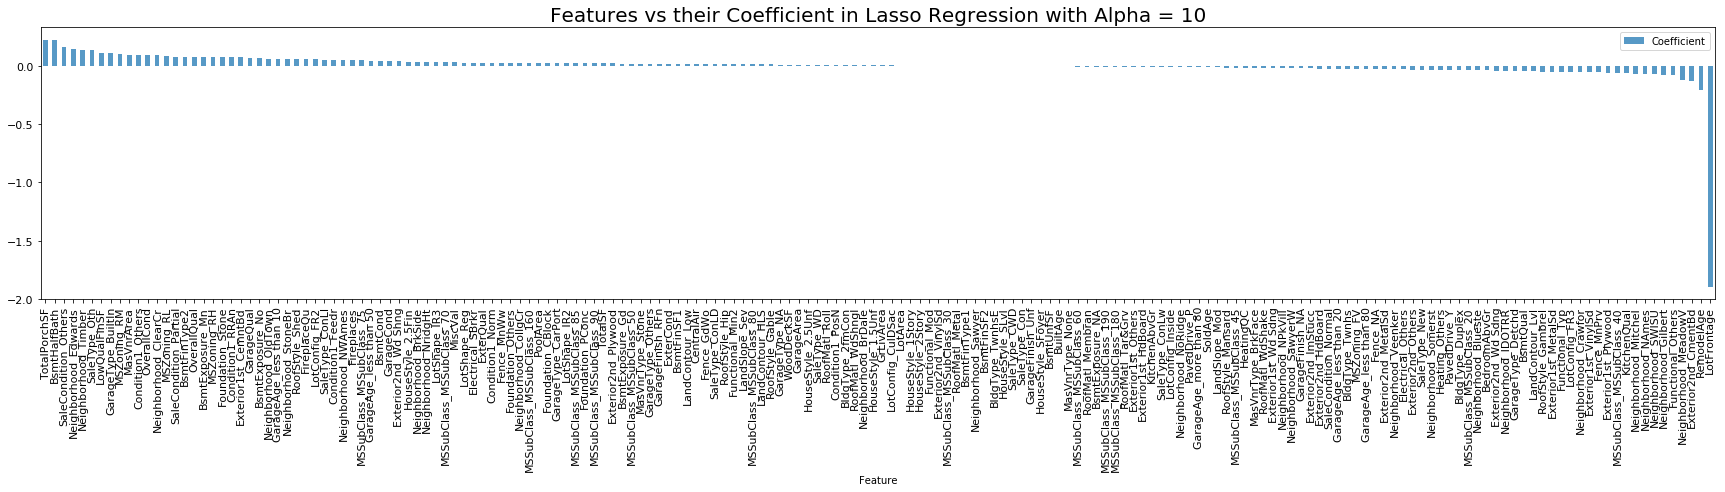

In [119]:
#Lets plot Features with their Coefficient Values
sorted_ridge_v2.set_index('Feature',inplace=True)
sorted_ridge_v2.plot(kind='bar',figsize=(30,5),alpha=0.75,fontsize = 11)
plt.title('Features vs their Coefficient in Lasso Regression with Alpha = 10', fontsize=20)
plt.show()

#I see that after doubling alpha value also, we are getting almost same train and test r2 score.

But my coefficient values of features have been reduced a little.

## Lasso Regression

In [120]:
from sklearn.linear_model import Lasso

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.002, 0.01, 0.1,1.0, 5.0, 10.0,20.0, 50.0, 100.0, 200.0]}
lasso =Lasso()
#cross-valiadtion
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid=hyper_param,
                        scoring = 'neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.002, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [121]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=0.02]
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022386,0.003554,0.001199,0.000400,0.001,{'alpha': 0.001},-0.192773,-0.164804,-0.144508,-0.161140,-0.159204,-0.164513,0.015755,1,-0.134306,-0.140878,-0.145397,-0.142671,-0.144881,-0.141627,0.004001
1,0.016191,0.006010,0.001599,0.000490,0.002,{'alpha': 0.002},-0.195179,-0.161323,-0.141002,-0.162701,-0.163362,-0.164743,0.017383,2,-0.140909,-0.148435,-0.152718,-0.148111,-0.149772,-0.147989,0.003896
2,0.011594,0.002153,0.001399,0.000489,0.01,{'alpha': 0.01},-0.208603,-0.179615,-0.158384,-0.177004,-0.170045,-0.178760,0.016665,3,-0.165605,-0.171383,-0.175620,-0.171795,-0.173944,-0.171669,0.003396


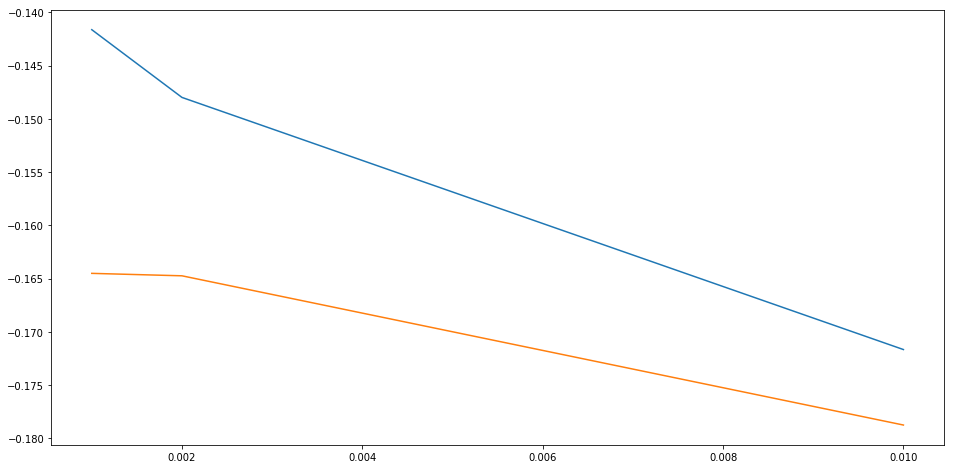

In [122]:
#plotting neg mean train and test score with alpha
plt.figure(figsize=(16,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.show()

In [123]:
lasso_model_cv.best_params_

{'alpha': 0.001}

In [124]:
#alpha = 0.001
lasso= Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_train_pred = lasso.predict(X_train)
print('Train R2 Score',r2_score(y_train,y_train_pred))

y_test_pred = lasso.predict(X_test)
print('Test R2 Score',r2_score(y_test,y_test_pred))


Train R2 Score 0.9033813007845058
Test R2 Score 0.9094448231523559


In [125]:
#Lets Now See Important Factors and their coefficients from Lasso Regression

lasso_model_parameter = list(lasso.coef_)
lasso_model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coefficient']
sorted_lasso_v1 = lasso_coef.sort_values(by='Coefficient', ascending=False)
sorted_lasso_v1

,Feature,Coefficient
34,TotalPorchSF,0.264077
18,BsmtHalfBath,0.159374
3,OverallCond,0.140134
4,MasVnrArea,0.092838
2,OverallQual,0.079408
25,GarageQual,0.073666
22,Fireplaces,0.046209
10,BsmtFinSF1,0.034822
26,GarageCond,0.034298
24,GarageArea,0.032709


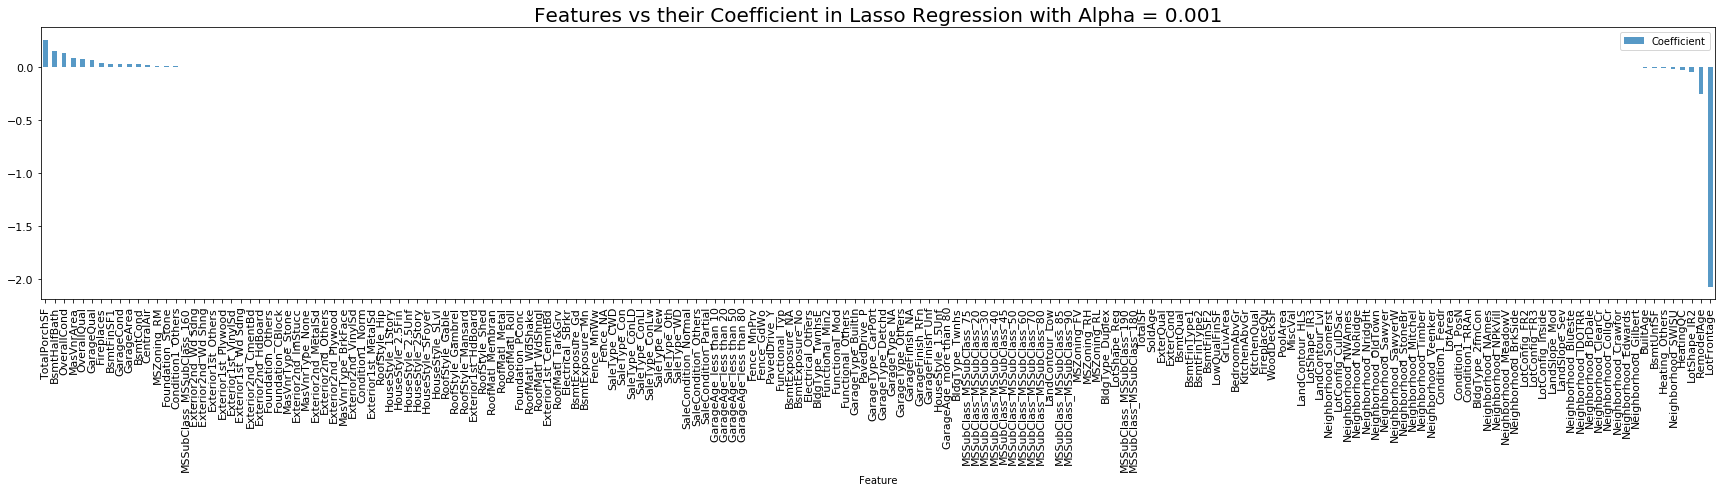

In [126]:
#Lets plot Features with their Coefficient Values
sorted_lasso_v1.set_index('Feature',inplace=True)
sorted_lasso_v1.plot(kind='bar',figsize=(30,5),alpha=0.75,fontsize = 11)
plt.title('Features vs their Coefficient in Lasso Regression with Alpha = 0.001', fontsize=20)
plt.show()

In [127]:
print('Number of Features to be considered in Lasso Regression with alpha = 0.001: ',lasso_coef[lasso_coef['Coefficient']!=0].shape[0])

Number of Features to be considered in Lasso Regression with alpha = 0.001:  24


In [132]:
#Important Features to be considered in Laaso with alpha=0.001
sorted_lasso_v1[sorted_lasso_v1['Coefficient']!=0]

,Coefficient
Feature,
TotalPorchSF,0.264077
BsmtHalfBath,0.159374
OverallCond,0.140134
MasVnrArea,0.092838
OverallQual,0.079408
GarageQual,0.073666
Fireplaces,0.046209
BsmtFinSF1,0.034822
GarageCond,0.034298


In [128]:
#Lets see what happens if I double the value of alpha in Lasso Regression
lasso= Lasso(alpha = 0.02)
lasso.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_train_pred = lasso.predict(X_train)
print('Train R2 Score',r2_score(y_train,y_train_pred))

y_test_pred = lasso.predict(X_test)
print('Test R2 Score',r2_score(y_test,y_test_pred))
lasso_model_parameter = list(lasso.coef_)
lasso_model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coefficient']
sorted_lasso_v2 = lasso_coef.sort_values(by='Coefficient', ascending=False)
sorted_lasso_v2

Train R2 Score 0.8935627922052984
Test R2 Score 0.9019862480425986


,Feature,Coefficient
34,TotalPorchSF,0.240922
3,OverallCond,0.162709
18,BsmtHalfBath,0.142602
25,GarageQual,0.086153
2,OverallQual,0.084940
4,MasVnrArea,0.069751
22,Fireplaces,0.041162
10,BsmtFinSF1,0.039322
24,GarageArea,0.034607
15,CentralAir,0.028200


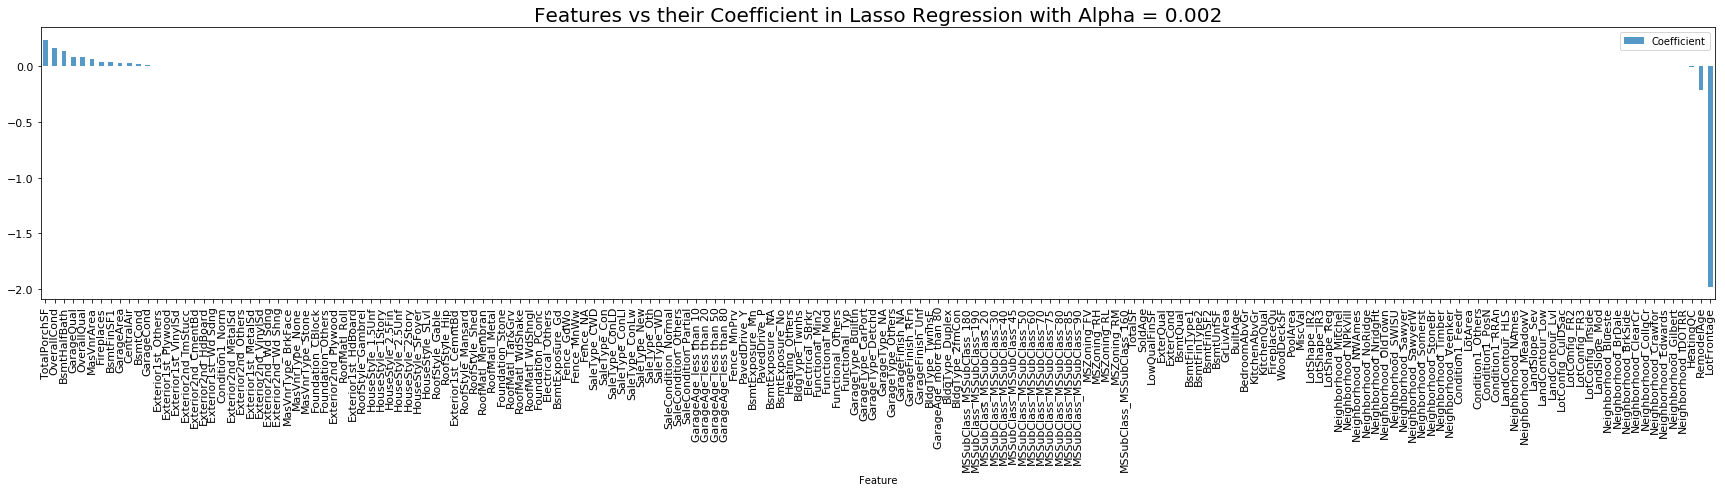

In [129]:
#Lets plot Features with their Coefficient Values
sorted_lasso_v2.set_index('Feature',inplace=True)
sorted_lasso_v2.plot(kind='bar',figsize=(30,5),alpha=0.75,fontsize = 11)
plt.title('Features vs their Coefficient in Lasso Regression with Alpha = 0.002', fontsize=20)
plt.show()

In [130]:
print('Number of Features to be considered in Lasso Regression with alpha = 0.002: ',lasso_coef[lasso_coef['Coefficient']!=0].shape[0])

Number of Features to be considered in Lasso Regression with alpha = 0.002:  15


In [131]:
#TopFeatures using Lasso Regresison with alpha = 0.002

lasso_coef[lasso_coef['Coefficient']!=0]

,Feature,Coefficient
0,LotFrontage,-1.979810
2,OverallQual,0.084940
3,OverallCond,0.162709
4,MasVnrArea,0.069751
8,BsmtCond,0.020947
10,BsmtFinSF1,0.039322
14,HeatingQC,-0.009786
15,CentralAir,0.028200
18,BsmtHalfBath,0.142602
22,Fireplaces,0.041162


Insights -
I see that after doubling alpha value also, we are getting almost same train and test r2 score.

But my coefficient values of features have been reduced a little

# Observations:
### Summary Report of Ridge Regression:  
- Best Alpha value: 5
- Train R2 score: 0.939
- Test R2 Score: 0.921
- Coefficients to be considered - 180
- Most Important Features in Ridge with alpha =10:
    - Feature Name        : Coefficient Value
    - BsmtHalfBath	0.233132
	- TotalPorchSF	0.221519
	- SaleCondition_Others	0.179019
	- SaleType_Oth	0.171857
	- Neighborhood_Timber	0.169992
	- Neighborhood_Edwards	0.166492
	- MSZoning_RM	0.144962
	- MSZoning_RL	0.144927
    - Neighborhood_MeadowV	-0.138831
	- Exterior2nd_CmentBd	-0.169841
	- RemodelAge	-0.237726
	- LotFrontage	-1.894869
    
    
    
-- If Double value of alpha (alpha = 10) is chosen for Ridge:
    - Train R2 score: 0.936
    - Test R2 score: 0.936
    - Coefficients to be considered - 180

 
    
### Summary Report of Lasso Regression:


- Best Alpha value: 0.001
- Train R2 score: 0.903
- Test R2 Score: 0.909
- Coefficients to be considered - 24
- Most Important Features:
    - Feature Name         - Coefficient Value
    - TotalPorchSF	0.264077
    - BsmtHalfBath	0.159374
    - OverallCond	0.140134
    - MasVnrArea	0.092838
    - OverallQual	0.079408
    - GarageQual	0.073666
    - Fireplaces	0.046209
    - BsmtFinSF1	0.034822
    - GarageCond	0.034298
    - GarageArea	0.032709
    - BsmtCond	0.031943
    - CentralAir	0.022526
    - MSZoning_RM	0.018493
    - Foundation_Stone	0.018131
    - Condition1_Others	0.009656
    - MSSubClass_MSSubClass_160	0.003861
    - BuiltAge	-0.001807
    - BsmtUnfSF	-0.003177
    - Heating_Others	-0.005990
    - Neighborhood_SWISU	-0.012017
    - HeatingQC	-0.022035
    - LotShape_IR2	-0.046248
    - RemodelAge	-0.249640
    - LotFrontage	-2.076357
    
    

-- If Double value of alpha (alpha = 0.002) is chosen for Lasso Regression:
    - Train R2 score: 0.894
    - Test R2 score: 0.902
    - Coefficients to be considered - 15
    - Top 15 Features:
        -> TotalPorchSF	0.240922
        -> OverallCond	0.162709
        -> BsmtHalfBath	0.142602
        -> GarageQual	0.086153
        -> OverallQual	0.084940
        -> MasVnrArea	0.069751
        -> Fireplaces	0.041162
        -> BsmtFinSF1	0.039322
        -> GarageArea	0.034607
        -> CentralAir	0.028200
        -> BsmtCond	0.020947
        -> GarageCond	0.013833
        -> HeatingQC	-0.009786
        -> RemodelAge	-0.209610
        -> LotFrontage	-1.979810
    
    
Even Though Train r2-score and test r2-score of both train and test dataset is on par, But I will prefer Lasso Regression results here.
Reason being - I see that some of the features which Ridge Regression model has provided has coefficient value almost equal to 0 but not excat 0.

But Lasso provides coefficient value of exact 0 for insignificant variables, and Hence I am able to get only 15 varaiables to be considered in this model. This shows that my model is more generalized. Lasso Regresison also works as a Feature Reduction algorithm.

# Recommendations:

1. Comapny should focus on houses with more sqaue feet area (i.e. sum of first floor, basement and second floor).
2. Houses with more overall quality can get us more benefit rather than houses with bad condition.
3. People pay more for Amenities like Basement, Garage, Air - conditioning, half bath in basement. We should focus on these houses as they are sold more in US market.
4. As we have freezing winter in US most of the time in a year, so people prefer houses with fireplaces. 
5. Houses with less distance to the main street are more in public demand and can get us huge benefit.

Negative Factors:
1. Houses with more age (either built or remodeled) are not prefered in market. Company should focus on newly built houses otherwise may end up in loss.
2. Houses with more distance to the main street are less sold and less preferable among people.